In [1]:
import re
import pandas as pd
import time
import warnings
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
warnings.filterwarnings("ignore")
from datetime import datetime

# Sample log data (replace this with the path to your log file)
log_file_path = 'tick_data_20241029_153255.txt'

# Define regex patterns for each log type
request_pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d{3}) - Requesting market data for strike price: (\d+), right: (\w), date: (\d+), reqId=(\d+)'
greeks_pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d{3}) - GREEKS: ReqId: (\d+), IV: ([\d.]+), Delta: ([\d.-]+), OptionPrice: ([\d.-]+|None), Gamma: ([\d.]+), Vega: ([\d.]+), Theta: ([\d.-]+), UnderlyingPrice: ([\d.]+)'
prices_pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d{3}) - PRICES: ReqId: (\d+), TickType: (\d+), Price: ([\d.-]+), Attrib: CanAutoExecute: (\d), PastLimit: (\d), PreOpen: (\d)'

# Data lists for each log type
request_data = []
greeks_data = []
prices_data = []

# Read and parse the log file
with open(log_file_path, 'r') as file:
    for line in file:
        # Check for 'Requesting market data' line
        request_match = re.match(request_pattern, line)
        if request_match:
            request_data.append(request_match.groups())
            continue
        
        # Check for 'GREEKS' line
        greeks_match = re.match(greeks_pattern, line)
        if greeks_match:
            greeks_data.append(greeks_match.groups())
            continue
        
        # Check for 'PRICES' line
        prices_match = re.match(prices_pattern, line)
        if prices_match:
            prices_data.append(prices_match.groups())

# Create DataFrames from parsed data
df_requests = pd.DataFrame(request_data, columns=["Timestamp", "StrikePrice", "Right", "Date", "ReqId"])
df_requests["StrikePrice"] = df_requests["StrikePrice"].astype(int)
df_requests["Date"] = pd.to_datetime(df_requests["Date"], format='%Y%m%d')

df_greeks = pd.DataFrame(greeks_data, columns=["Timestamp", "ReqId", "IV", "Delta", "OptionPrice", "Gamma", "Vega", "Theta", "UnderlyingPrice"])
df_greeks["IV"] = df_greeks["IV"].astype(float)
df_greeks["Delta"] = df_greeks["Delta"].astype(float)
df_greeks["OptionPrice"] = pd.to_numeric(df_greeks["OptionPrice"], errors='coerce')
df_greeks["Gamma"] = df_greeks["Gamma"].astype(float)
df_greeks["Vega"] = df_greeks["Vega"].astype(float)
df_greeks["Theta"] = df_greeks["Theta"].astype(float)
df_greeks["UnderlyingPrice"] = df_greeks["UnderlyingPrice"].astype(float)

df_prices = pd.DataFrame(prices_data, columns=["Timestamp", "ReqId", "TickType", "Price", "CanAutoExecute", "PastLimit", "PreOpen"])
df_prices["Price"] = df_prices["Price"].astype(float)
df_prices["TickType"] = df_prices["TickType"].astype(int)
df_prices["CanAutoExecute"] = df_prices["CanAutoExecute"].astype(int)
df_prices["PastLimit"] = df_prices["PastLimit"].astype(int)
df_prices["PreOpen"] = df_prices["PreOpen"].astype(int)

In [2]:
print(len(df_requests))
df_requests

30


Timestamp  StrikePrice Right       Date ReqId
0   2024-10-29 15:32:59.609          571     P 2024-10-29   101
1   2024-10-29 15:32:59.609          571     P 2024-10-30   102
2   2024-10-29 15:32:59.609          571     P 2024-11-05   103
3   2024-10-29 15:32:59.609          571     C 2024-10-29   104
4   2024-10-29 15:32:59.609          571     C 2024-10-30   105
5   2024-10-29 15:32:59.609          571     C 2024-11-05   106
6   2024-10-29 15:32:59.610          576     P 2024-10-29   107
7   2024-10-29 15:32:59.610          576     P 2024-10-30   108
8   2024-10-29 15:32:59.610          576     P 2024-11-05   109
9   2024-10-29 15:32:59.610          576     C 2024-10-29   110
10  2024-10-29 15:32:59.610          576     C 2024-10-30   111
11  2024-10-29 15:32:59.610          576     C 2024-11-05   112
12  2024-10-29 15:32:59.610          581     P 2024-10-29   113
13  2024-10-29 15:32:59.610          581     P 2024-10-30   114
14  2024-10-29 15:32:59.610          581     P 2024-11-05   115
15  2024-10-29 15:32:59.610          581     C 2024-10-29   116
16  2024-10-29 15:32:59.610          581     C 2024-10-30   117
17  2024-10-29 15:32:59.611          581     C 2024-11-05   118
18  2024-10-29 15:32:59.611          586     P 2024-10-29   119
19  2024-10-29 15:32:59.611          586     P 2024-10-30   120
20  2024-10-29 15:32:59.611          586     P 2024-11-05   121
21  2024-10-29 15:32:59.611          586     C 2024-10-29   122
22  2024-10-29 15:32:59.611          586     C 2024-10-30   123
23  2024-10-29 15:32:59.611          586     C 2024-11-05   124
24  2024-10-29 15:32:59.611          591     P 2024-10-29   125
25  2024-10-29 15:32:59.611          591     P 2024-10-30   126
26  2024-10-29 15:32:59.611          591     P 2024-11-05   127
27  2024-10-29 15:32:59.611          591     C 2024-10-29   128
28  2024-10-29 15:32:59.612          591     C 2024-10-30   129
29  2024-10-29 15:32:59.612          591     C 2024-11-05   130

In [3]:
#df_greeks

In [4]:
#df_prices

ELECCIÓN DE NIVELES

In [5]:
#elección del strike
level = 116
df_requests['ReqId'] = df_requests['ReqId'].astype(type(level))
print(level)

116


In [6]:
strike_price = df_requests.loc[df_requests['ReqId'] == level, 'StrikePrice'].values
tipo = df_requests.loc[df_requests['ReqId'] == level, 'Right'].values
vto = df_requests.loc[df_requests['ReqId'] == level, 'Date'].values
vto = pd.to_datetime(pd.Series(vto)).dt.date.values

# CLEAN df_prices option prices

In [7]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Filter rows within the 1.5 * IQR range
    df_filtered = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df_filtered

In [8]:
df_prices['ReqId'] = df_prices['ReqId'].astype(int)
df_prices = df_prices[df_prices['ReqId'] == level]
df_prices = df_prices.reset_index(drop=True)
df_prices = remove_outliers(df_prices, 'Price')
df_prices['Avg_Price'] = df_prices['Price'].rolling(window=40).mean()
df_prices = df_prices.drop(columns=['CanAutoExecute', 'PastLimit', 'PreOpen'])
df_prices

Timestamp  ReqId  TickType  Price  Avg_Price
0      2024-10-29 15:33:01.092    116         4   1.25        NaN
1      2024-10-29 15:33:01.093    116         4   1.22        NaN
2      2024-10-29 15:33:01.093    116         6   1.77        NaN
4      2024-10-29 15:33:01.093    116         9   1.18        NaN
5      2024-10-29 15:33:01.095    116         1   1.22        NaN
...                        ...    ...       ...    ...        ...
67010  2024-10-29 21:14:54.370    116         2   2.01    1.92325
67012  2024-10-29 21:14:54.719    116         2   1.94    1.92650
67014  2024-10-29 21:14:54.893    116         2   1.94    1.92425
67016  2024-10-29 21:14:55.597    116         2   1.94    1.92375
67018  2024-10-29 21:14:56.300    116         2   1.94    1.92700

[65252 rows x 5 columns]

In [9]:
# Subsegmento_Define the number of rows to display
seg = 230000
# Show only the first `seg` rows of the DataFrame
df_prices_filtered = df_prices.head(seg)

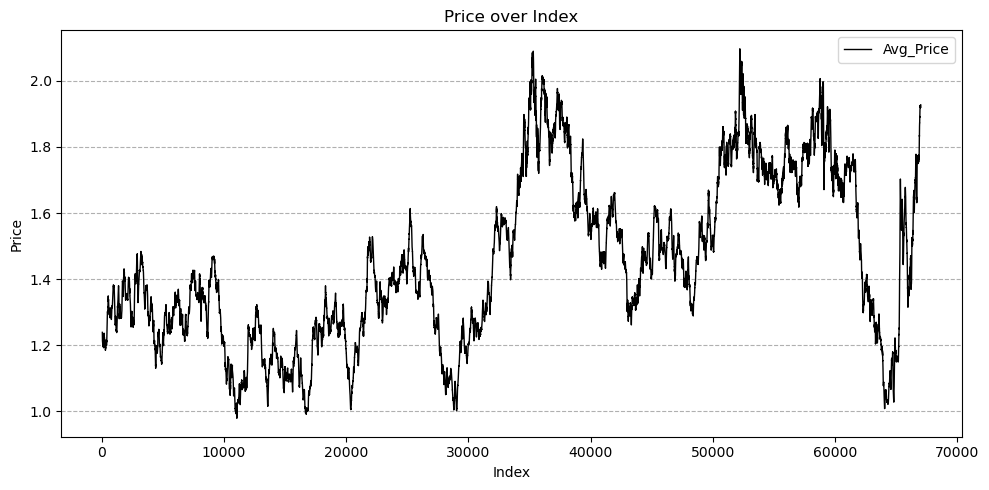

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(df_prices_filtered.index, df_prices_filtered['Avg_Price'], color='black', label='Avg_Price', linewidth=1)
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Price over Index')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# CLEAN  df_greeks prices

In [11]:
df_greeks = df_greeks[df_greeks['IV'] != 0]
df_greeks['ReqId'] = df_greeks['ReqId'].astype(int)
df_greeks = df_greeks[df_greeks['ReqId'] == level]
df_greeks['IV'] = df_greeks['IV'].round(3)
df_greeks = df_greeks.reset_index(drop=True)
df_greeks['UnderlyingPrice'] = df_greeks['UnderlyingPrice'].round(2)

In [12]:
#df_prices = remove_outliers(df_prices, 'Price')
df_greeks['Avg_IV'] = df_greeks['IV'].rolling(window=40).mean()
df_greeks['Avg_Theta'] = df_greeks['Theta'].rolling(window=40).mean()
df_greeks['Avg_Delta'] = df_greeks['Delta'].rolling(window=40).mean()
df_greeks['Avg_Gamma'] = df_greeks['Gamma'].rolling(window=40).mean()
df_greeks['Avg_Vega'] = df_greeks['Vega'].rolling(window=40).mean()

In [13]:
df_greeks

Timestamp  ReqId     IV   Delta  OptionPrice   Gamma  \
0      2024-10-29 15:33:01.346    116  0.207  0.4538         1.07  0.1275   
1      2024-10-29 15:33:01.348    116  0.206  0.5034         1.24  0.1313   
2      2024-10-29 15:33:01.348    116  0.210  0.5034         1.25  0.1292   
3      2024-10-29 15:33:02.247    116  0.210  0.4538         1.07  0.1275   
4      2024-10-29 15:33:02.248    116  0.206  0.4982         1.22  0.1312   
...                        ...    ...    ...     ...          ...     ...   
25911  2024-10-29 21:14:58.045    116  0.493  0.9288         1.74  0.1087   
25912  2024-10-29 21:14:58.046    116  0.779  0.8232         2.47  0.1313   
25913  2024-10-29 21:15:00.143    116  0.493  0.9247         1.35  0.1137   
25914  2024-10-29 21:15:00.143    116  0.779  0.8178         2.45  0.1337   
25915  2024-10-29 21:15:00.143    116  0.514  0.9161         1.93  0.1184   

         Vega   Theta  UnderlyingPrice    Avg_IV  Avg_Theta  Avg_Delta  \
0      0.0593 -1.0700           580.58       NaN        NaN        NaN   
1      0.0590 -1.2220           581.00       NaN        NaN        NaN   
2      0.0590 -1.2320           581.00       NaN        NaN        NaN   
3      0.0593 -1.0700           580.58       NaN        NaN        NaN   
4      0.0590 -1.2200           580.96       NaN        NaN        NaN   
...       ...     ...              ...       ...        ...        ...   
25911  0.0033 -0.0000           582.83  0.588525  -0.056158   0.897142   
25912  0.0068 -0.6395           582.83  0.588525  -0.068907   0.897040   
25913  0.0033 -0.0000           582.79  0.589475  -0.068907   0.896470   
25914  0.0068 -0.6595           582.79  0.596625  -0.085395   0.893565   
25915  0.0043 -0.1395           582.79  0.590000  -0.085645   0.895720   

       Avg_Gamma  Avg_Vega  
0            NaN       NaN  
1            NaN       NaN  
2            NaN       NaN  
3            NaN       NaN  
4            NaN       NaN  
...          ...       ...  
25911   0.112000  0.004482  
25912   0.112047  0.004482  
25913   0.112563  0.004490  
25914   0.113343  0.004577  
25915   0.113097  0.004515  

[25916 rows x 14 columns]

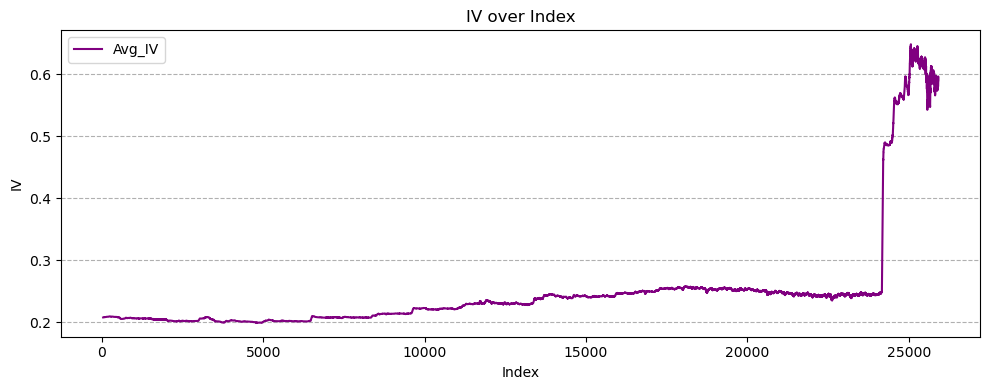

In [14]:
plt.figure(figsize=(10, 4))
plt.plot(df_greeks.index, df_greeks['Avg_IV'], color='purple', label='Avg_IV')
plt.xlabel('Index')
plt.ylabel('IV')
plt.title('IV over Index')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [15]:
# Define the number of rows to display
seg = 23000
df_greeks_seg = df_greeks.head(seg)

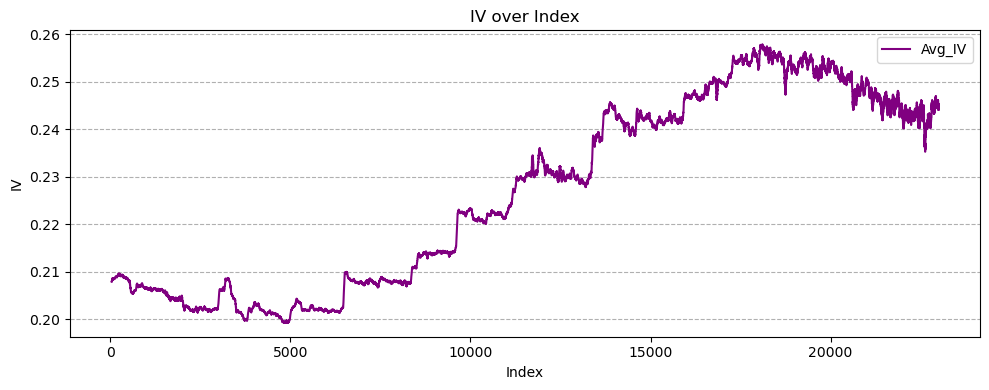

In [16]:
plt.figure(figsize=(10, 4))
plt.plot(df_greeks_seg.index, df_greeks_seg['Avg_IV'], color='purple', label='Avg_IV')
plt.xlabel('Index')
plt.ylabel('IV')
plt.title('IV over Index')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Unión de los Dataframes

In [17]:
df_greeks

Timestamp  ReqId     IV   Delta  OptionPrice   Gamma  \
0      2024-10-29 15:33:01.346    116  0.207  0.4538         1.07  0.1275   
1      2024-10-29 15:33:01.348    116  0.206  0.5034         1.24  0.1313   
2      2024-10-29 15:33:01.348    116  0.210  0.5034         1.25  0.1292   
3      2024-10-29 15:33:02.247    116  0.210  0.4538         1.07  0.1275   
4      2024-10-29 15:33:02.248    116  0.206  0.4982         1.22  0.1312   
...                        ...    ...    ...     ...          ...     ...   
25911  2024-10-29 21:14:58.045    116  0.493  0.9288         1.74  0.1087   
25912  2024-10-29 21:14:58.046    116  0.779  0.8232         2.47  0.1313   
25913  2024-10-29 21:15:00.143    116  0.493  0.9247         1.35  0.1137   
25914  2024-10-29 21:15:00.143    116  0.779  0.8178         2.45  0.1337   
25915  2024-10-29 21:15:00.143    116  0.514  0.9161         1.93  0.1184   

         Vega   Theta  UnderlyingPrice    Avg_IV  Avg_Theta  Avg_Delta  \
0      0.0593 -1.0700           580.58       NaN        NaN        NaN   
1      0.0590 -1.2220           581.00       NaN        NaN        NaN   
2      0.0590 -1.2320           581.00       NaN        NaN        NaN   
3      0.0593 -1.0700           580.58       NaN        NaN        NaN   
4      0.0590 -1.2200           580.96       NaN        NaN        NaN   
...       ...     ...              ...       ...        ...        ...   
25911  0.0033 -0.0000           582.83  0.588525  -0.056158   0.897142   
25912  0.0068 -0.6395           582.83  0.588525  -0.068907   0.897040   
25913  0.0033 -0.0000           582.79  0.589475  -0.068907   0.896470   
25914  0.0068 -0.6595           582.79  0.596625  -0.085395   0.893565   
25915  0.0043 -0.1395           582.79  0.590000  -0.085645   0.895720   

       Avg_Gamma  Avg_Vega  
0            NaN       NaN  
1            NaN       NaN  
2            NaN       NaN  
3            NaN       NaN  
4            NaN       NaN  
...          ...       ...  
25911   0.112000  0.004482  
25912   0.112047  0.004482  
25913   0.112563  0.004490  
25914   0.113343  0.004577  
25915   0.113097  0.004515  

[25916 rows x 14 columns]

In [18]:
df_greeks['Timestamp'] = pd.to_datetime(df_greeks['Timestamp'])
df_prices_filtered['Timestamp'] = pd.to_datetime(df_prices_filtered['Timestamp'])

# Ordena ambos DataFrames por la columna 'Timestamp' para que el merge_asof funcione correctamente
df1 = df_greeks.sort_values(by='Timestamp')
df2 = df_prices_filtered.sort_values(by='Timestamp')

# Realiza una unión "asof" en el campo 'Timestamp', uniendo filas de acuerdo al valor más cercano de Timestamp
# Esta unión no es estrictamente igual (como un "join" clásico) sino que une la información más próxima
df = pd.merge_asof(df1, df2, on='Timestamp', direction='nearest')
df = df.drop(columns=['ReqId_y'])

In [19]:
df['VarDelta'] = 0.0
df['VarTheta'] = 0.0
df['VarVega'] = 0.0
df['VarTotal'] = 0.0

In [20]:
# Define the number of rows to display
seg = 23000
df = df.head(seg)
df

Timestamp  ReqId_x     IV   Delta  OptionPrice   Gamma  \
0     2024-10-29 15:33:01.346      116  0.207  0.4538         1.07  0.1275   
1     2024-10-29 15:33:01.348      116  0.206  0.5034         1.24  0.1313   
2     2024-10-29 15:33:01.348      116  0.210  0.5034         1.25  0.1292   
3     2024-10-29 15:33:02.247      116  0.210  0.4538         1.07  0.1275   
4     2024-10-29 15:33:02.248      116  0.206  0.4982         1.22  0.1312   
...                       ...      ...    ...     ...          ...     ...   
22995 2024-10-29 20:36:16.179      116  0.261  0.9006         1.90  0.1333   
22996 2024-10-29 20:36:18.177      116  0.251  0.9080         1.83  0.1309   
22997 2024-10-29 20:36:18.178      116  0.261  0.8993         1.88  0.1346   
22998 2024-10-29 20:36:18.178      116  0.209  0.9451         1.87  0.1059   
22999 2024-10-29 20:36:20.129      116  0.251  0.9066         1.85  0.1323   

         Vega   Theta  UnderlyingPrice   Avg_IV  ...  Avg_Delta  Avg_Gamma  \
0      0.0593 -1.0700           580.58      NaN  ...        NaN        NaN   
1      0.0590 -1.2220           581.00      NaN  ...        NaN        NaN   
2      0.0590 -1.2320           581.00      NaN  ...        NaN        NaN   
3      0.0593 -1.0700           580.58      NaN  ...        NaN        NaN   
4      0.0590 -1.2200           580.96      NaN  ...        NaN        NaN   
...       ...     ...              ...      ...  ...        ...        ...   
22995  0.0086 -0.2179           582.68  0.24470  ...   0.918005   0.121550   
22996  0.0086 -0.1579           582.67  0.24445  ...   0.918002   0.121720   
22997  0.0086 -0.2079           582.67  0.24540  ...   0.916967   0.122480   
22998  0.0065 -0.1979           582.67  0.24435  ...   0.917682   0.122115   
22999  0.0086 -0.1880           582.66  0.24410  ...   0.917660   0.122303   

       Avg_Vega  TickType  Price  Avg_Price  VarDelta  VarTheta  VarVega  \
0           NaN         2   1.26        NaN       0.0       0.0      0.0   
1           NaN         2   1.26        NaN       0.0       0.0      0.0   
2           NaN         2   1.26        NaN       0.0       0.0      0.0   
3           NaN         1   1.21        NaN       0.0       0.0      0.0   
4           NaN         1   1.21        NaN       0.0       0.0      0.0   
...         ...       ...    ...        ...       ...       ...      ...   
22995  0.007980         1   1.85    1.85975       0.0       0.0      0.0   
22996  0.007977         1   1.83    1.85250       0.0       0.0      0.0   
22997  0.008027         1   1.83    1.85250       0.0       0.0      0.0   
22998  0.007972         1   1.83    1.85250       0.0       0.0      0.0   
22999  0.007970         1   1.84    1.84925       0.0       0.0      0.0   

       VarTotal  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
22995       0.0  
22996       0.0  
22997       0.0  
22998       0.0  
22999       0.0  

[23000 rows x 21 columns]

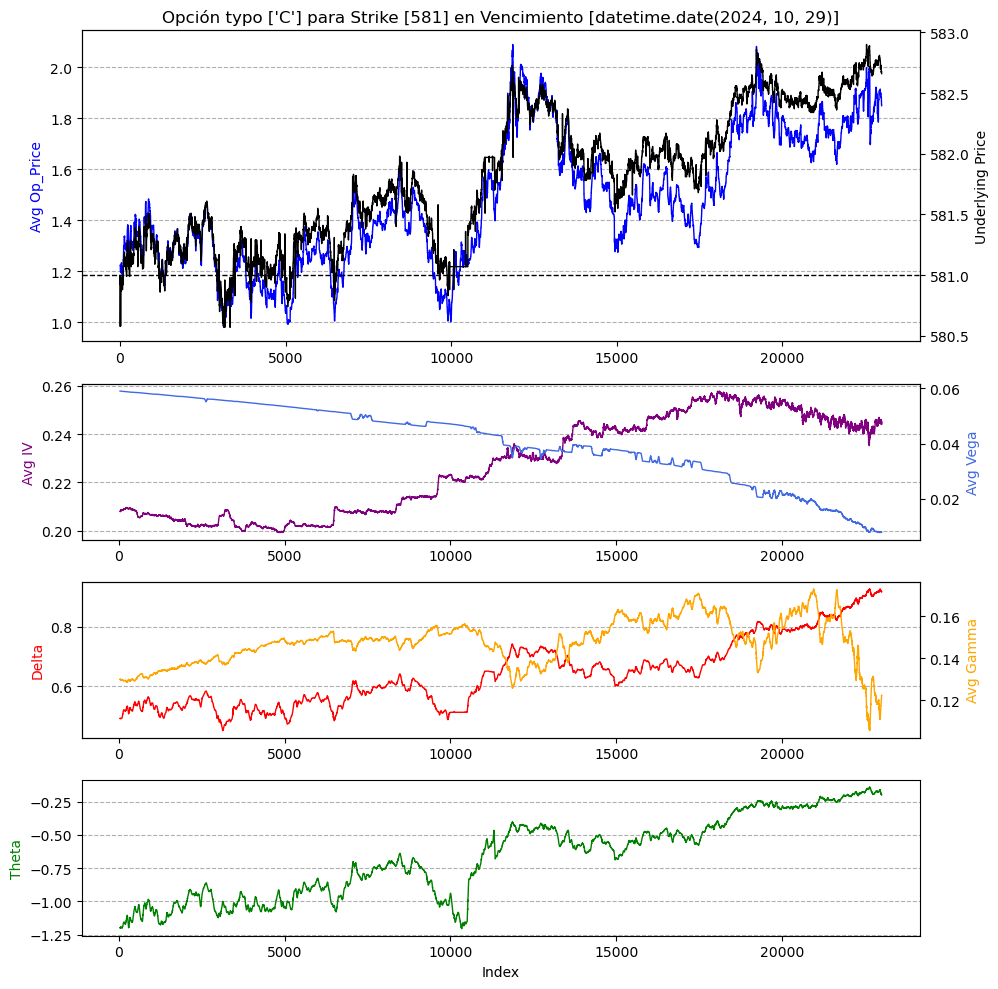

In [21]:
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(4, 1, height_ratios=[2, 1, 1, 1])  # Adjust layout ratios for four subplots

ax1 = fig.add_subplot(gs[0])
ax1.plot(df.index, df['Avg_Price'], color='blue', label='Avg_Op_Price', linewidth=1)
ax1.set_ylabel('Avg Op_Price')
ax1.yaxis.label.set_color('blue')
ax1.grid(axis='y', linestyle='--')

ax2 = ax1.twinx()
ax2.plot(df.index, df['UnderlyingPrice'], color='black', label='UnderlyingPrice', linewidth=1)
ax2.set_ylabel('Underlying Price')
ax2.axhline(y=581, color='black', linestyle='--', linewidth=1)
ax2.yaxis.label.set_color('black')

ax1.set_title(f'Opción typo {tipo} para Strike {strike_price} en Vencimiento {vto}')

ax3 = fig.add_subplot(gs[1])
ax3.plot(df.index, df['Avg_IV'], color='purple', label='Avg_IV', linewidth=1)
ax3.set_ylabel('Avg IV')
ax3.yaxis.label.set_color('purple')
ax3.grid(axis='y', linestyle='--')

ax3_vega = ax3.twinx()
ax3_vega.plot(df.index, df['Avg_Vega'], color='royalblue', label='Avg_Vega', linewidth=1)
ax3_vega.set_ylabel('Avg Vega')
ax3_vega.yaxis.label.set_color('royalblue')

ax5 = fig.add_subplot(gs[2])
ax5.plot(df.index, df['Avg_Delta'], color='red', label='Delta', linewidth=1)
ax5.set_ylabel('Delta')
ax5.yaxis.label.set_color('red')
ax5.grid(axis='y', linestyle='--')

ax6 = ax5.twinx()
ax6.plot(df.index, df['Avg_Gamma'], color='orange', label='Avg_Gamma', linewidth=1)
ax6.set_ylabel('Avg Gamma')
ax6.yaxis.label.set_color('orange')

ax7 = fig.add_subplot(gs[3])
ax7.plot(df.index, df['Avg_Theta'], color='green', label='Theta', linewidth=1)
ax7.set_ylabel('Theta')
ax7.yaxis.label.set_color('green')
ax7.set_xlabel('Index')
ax7.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Griegas

In [22]:
fila_100 = df.iloc[70]
print(fila_100)

Timestamp          2024-10-29 15:33:46.189000
ReqId_x                                   116
IV                                      0.208
Delta                                  0.4969
OptionPrice                              1.21
Gamma                                  0.1301
Vega                                   0.0589
Theta                                   -1.21
UnderlyingPrice                        580.95
Avg_IV                               0.208525
Avg_Theta                            -1.19325
Avg_Delta                            0.492117
Avg_Gamma                             0.12963
Avg_Vega                              0.05899
TickType                                    4
Price                                    1.22
Avg_Price                               1.189
VarDelta                                  0.0
VarTheta                                  0.0
VarVega                                   0.0
VarTotal                                  0.0
Name: 70, dtype: object


In [23]:
fila_final = df.iloc[500]

# Imprime el resultado
print(fila_final)

Timestamp          2024-10-29 15:38:54.062000
ReqId_x                                   116
IV                                      0.203
Delta                                  0.5341
OptionPrice                              1.33
Gamma                                  0.1337
Vega                                   0.0585
Theta                                 -1.0823
UnderlyingPrice                        581.23
Avg_IV                                0.20835
Avg_Theta                           -1.055493
Avg_Delta                             0.54324
Avg_Gamma                            0.129625
Avg_Vega                               0.0585
TickType                                    1
Price                                    1.32
Avg_Price                               1.337
VarDelta                                  0.0
VarTheta                                  0.0
VarVega                                   0.0
VarTotal                                  0.0
Name: 500, dtype: object


In [24]:
Timestamp_100 = df.loc[70, 'Timestamp']           
UnderlyingPrice_100 = df.loc[70, 'UnderlyingPrice']                 
delta_100 = df.loc[70, 'Delta']
theta_100 = df.loc[70, 'Theta']
vega_100 = df.loc[70, 'Vega']
gamma_100 = df.loc[70, 'Gamma']
IV_100 = df.loc[70, 'IV']

In [25]:
def calcular_impactos(delta_100, theta_100, vega_100, gamma_100, IV_100, Timestamp_100, UnderlyingPrice_100, fin, df):
    # Extraer valores de la fila fin
    Timestamp_fin = df.loc[fin, 'Timestamp']
    UnderlyingPrice_fin = df.loc[fin, 'UnderlyingPrice']
    delta_fin = df.loc[fin, 'Delta']
    theta_fin = df.loc[fin, 'Theta']
    vega_fin = df.loc[fin, 'Vega']
    gamma_fin = df.loc[fin, 'Gamma']
    IV_fin = df.loc[fin, 'IV']
    
    # Comprobar valores nulos antes de calcular
    if pd.isnull([Timestamp_fin, UnderlyingPrice_fin, delta_fin, theta_fin, vega_fin, gamma_fin, IV_fin]).any():
        print(f"Valores nulos en la fila {fin}, saltando iteración.")
        return

    # 1. Calcular el impacto de Delta
    diferencia_precio_subyacente = round(UnderlyingPrice_fin - UnderlyingPrice_100, 3)
    impacto_delta = round(diferencia_precio_subyacente * delta_100, 4)

    # 2. Calcular el impacto de Theta
    tiempo_transcurrido_dias = round((Timestamp_fin - Timestamp_100).total_seconds() / 86400, 4)  # 86400 segundos en un día
    impacto_theta = round(theta_100 * tiempo_transcurrido_dias, 4)

    # 3. Calcular el impacto de Vega
    diferencia_iv = round(IV_fin - IV_100, 4)
    impacto_vega = round(diferencia_iv * vega_100, 4)  
    
    impacto_total_prima = round(impacto_delta + impacto_theta + impacto_vega,4)  
    # Asignar los valores de los porcentajes a las columnas del DataFrame
    df.at[fin, 'VarDelta'] = impacto_delta
    df.at[fin, 'VarTheta'] = impacto_theta
    df.at[fin, 'VarVega'] = impacto_vega
    df.at[fin, 'VarTotal'] = impacto_total_prima  
     
    # Mostrar los cálculos paso a paso y los resultados
    print(f"Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.{fin}")
    print(f"Diferencia subyacente: {diferencia_precio_subyacente}")
    print(f"Tiempo transcurrido:   {tiempo_transcurrido_dias} dias")
    print()
    print(f"Impacto Delta: {impacto_delta}") #({impacto_delta_pct}%)")    
    print(f"Impacto Theta: {impacto_theta}") #({impacto_theta_pct}%)")    
    print(f"Impacto Vega:  {impacto_vega}")  #({impacto_vega_pct}%)")
    print(f"IV: inicial {IV_100}-final {IV_fin}: Diferencia IV:{diferencia_iv}")
    print()
    print(f"Impacto agregado en la Prima: {impacto_total_prima}")
    print("-------------------------------------------------------------------------")


In [26]:
#valor discreto 
fin = 150
calcular_impactos(delta_100, theta_100, vega_100, gamma_100, IV_100, Timestamp_100, UnderlyingPrice_100, fin, df)

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.150
Diferencia subyacente: 0.2
Tiempo transcurrido:   0.0006 dias

Impacto Delta: 0.0994
Impacto Theta: -0.0007
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0987
-------------------------------------------------------------------------


In [27]:
print(len(df))

23000


In [ ]:
for i in range(69, len(df)):
    calcular_impactos(delta_100, theta_100, vega_100, gamma_100, IV_100, Timestamp_100, UnderlyingPrice_100, fin=i, df=df)
    time.sleep(0.2)

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.69
Diferencia subyacente: -0.05
Tiempo transcurrido:   -0.0 dias

Impacto Delta: -0.0248
Impacto Theta: 0.0
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: -0.0248
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.70
Diferencia subyacente: 0.0
Tiempo transcurrido:   0.0 dias

Impacto Delta: 0.0
Impacto Theta: -0.0
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.71
Diferencia subyacente: 0.0
Tiempo transcurrido:   0.0 dias

Impacto Delta: 0.0
Impacto Theta: -0.0
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.0001
----------------

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.93
Diferencia subyacente: -0.01
Tiempo transcurrido:   0.0002 dias

Impacto Delta: -0.005
Impacto Theta: -0.0002
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: -0.0052
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.94
Diferencia subyacente: -0.01
Tiempo transcurrido:   0.0002 dias

Impacto Delta: -0.005
Impacto Theta: -0.0002
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: -0.0051
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.95
Diferencia subyacente: 0.01
Tiempo transcurrido:   0.0002 dias

Impacto Delta: 0.005
Impacto Theta: -0.0002
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la P

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.116
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0004 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0005
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.0741
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.117
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0004 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0005
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la Prima: 0.0741
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.118
Diferencia subyacente: 0.14
Tiempo transcurrido:   0.0004 dias

Impacto Delta: 0.0696
Impacto Theta: -0.0005
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.140
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0006 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0007
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.0739
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.141
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0006 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0007
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agregado en la Prima: 0.074
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.142
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0006 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0007
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.164
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0008 dias

Impacto Delta: 0.0845
Impacto Theta: -0.001
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0835
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.165
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0008 dias

Impacto Delta: 0.0845
Impacto Theta: -0.001
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.0836
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.166
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0008 dias

Impacto Delta: 0.0845
Impacto Theta: -0.001
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.188
Diferencia subyacente: 0.14
Tiempo transcurrido:   0.0009 dias

Impacto Delta: 0.0696
Impacto Theta: -0.0011
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.0686
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.189
Diferencia subyacente: 0.09
Tiempo transcurrido:   0.001 dias

Impacto Delta: 0.0447
Impacto Theta: -0.0012
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0435
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.190
Diferencia subyacente: 0.09
Tiempo transcurrido:   0.001 dias

Impacto Delta: 0.0447
Impacto Theta: -0.0012
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.211
Diferencia subyacente: 0.23
Tiempo transcurrido:   0.0011 dias

Impacto Delta: 0.1143
Impacto Theta: -0.0013
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.113
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.212
Diferencia subyacente: 0.19
Tiempo transcurrido:   0.0011 dias

Impacto Delta: 0.0944
Impacto Theta: -0.0013
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la Prima: 0.0932
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.213
Diferencia subyacente: 0.19
Tiempo transcurrido:   0.0011 dias

Impacto Delta: 0.0944
Impacto Theta: -0.0013
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.235
Diferencia subyacente: 0.3
Tiempo transcurrido:   0.0013 dias

Impacto Delta: 0.1491
Impacto Theta: -0.0016
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.1476
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.236
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0013 dias

Impacto Delta: 0.159
Impacto Theta: -0.0016
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1573
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.237
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0013 dias

Impacto Delta: 0.159
Impacto Theta: -0.0016
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agregad

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.258
Diferencia subyacente: 0.22
Tiempo transcurrido:   0.0015 dias

Impacto Delta: 0.1093
Impacto Theta: -0.0018
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1074
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.259
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0015 dias

Impacto Delta: 0.0845
Impacto Theta: -0.0018
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la Prima: 0.0828
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.260
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0015 dias

Impacto Delta: 0.0845
Impacto Theta: -0.0018
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.282
Diferencia subyacente: 0.06
Tiempo transcurrido:   0.0017 dias

Impacto Delta: 0.0298
Impacto Theta: -0.0021
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: 0.0276
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.283
Diferencia subyacente: 0.05
Tiempo transcurrido:   0.0017 dias

Impacto Delta: 0.0248
Impacto Theta: -0.0021
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la Prima: 0.0228
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.284
Diferencia subyacente: 0.05
Tiempo transcurrido:   0.0017 dias

Impacto Delta: 0.0248
Impacto Theta: -0.0021
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.306
Diferencia subyacente: 0.25
Tiempo transcurrido:   0.0019 dias

Impacto Delta: 0.1242
Impacto Theta: -0.0023
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agregado en la Prima: 0.1221
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.307
Diferencia subyacente: 0.25
Tiempo transcurrido:   0.0019 dias

Impacto Delta: 0.1242
Impacto Theta: -0.0023
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la Prima: 0.122
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.308
Diferencia subyacente: 0.24
Tiempo transcurrido:   0.002 dias

Impacto Delta: 0.1193
Impacto Theta: -0.0024
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregad

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.330
Diferencia subyacente: 0.23
Tiempo transcurrido:   0.0021 dias

Impacto Delta: 0.1143
Impacto Theta: -0.0025
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1117
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.331
Diferencia subyacente: 0.2
Tiempo transcurrido:   0.0022 dias

Impacto Delta: 0.0994
Impacto Theta: -0.0027
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la Prima: 0.0968
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.332
Diferencia subyacente: 0.2
Tiempo transcurrido:   0.0022 dias

Impacto Delta: 0.0994
Impacto Theta: -0.0027
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agreg

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.354
Diferencia subyacente: 0.23
Tiempo transcurrido:   0.0024 dias

Impacto Delta: 0.1143
Impacto Theta: -0.0029
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la Prima: 0.1115
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.355
Diferencia subyacente: 0.23
Tiempo transcurrido:   0.0024 dias

Impacto Delta: 0.1143
Impacto Theta: -0.0029
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agregado en la Prima: 0.1116
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.356
Diferencia subyacente: 0.23
Tiempo transcurrido:   0.0024 dias

Impacto Delta: 0.1143
Impacto Theta: -0.0029
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agreg

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.377
Diferencia subyacente: 0.18
Tiempo transcurrido:   0.0025 dias

Impacto Delta: 0.0894
Impacto Theta: -0.003
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agregado en la Prima: 0.0866
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.378
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0025 dias

Impacto Delta: 0.0795
Impacto Theta: -0.003
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la Prima: 0.0766
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.379
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0025 dias

Impacto Delta: 0.0795
Impacto Theta: -0.003
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agregado

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.400
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0027 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0033
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agregado en la Prima: 0.0714
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.401
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0027 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0033
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.0711
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.402
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0027 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0033
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.424
Diferencia subyacente: 0.3
Tiempo transcurrido:   0.0029 dias

Impacto Delta: 0.1491
Impacto Theta: -0.0035
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1456
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.425
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.003 dias

Impacto Delta: 0.159
Impacto Theta: -0.0036
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la Prima: 0.1555
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.426
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.003 dias

Impacto Delta: 0.159
Impacto Theta: -0.0036
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agregado en la 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.448
Diferencia subyacente: 0.33
Tiempo transcurrido:   0.0031 dias

Impacto Delta: 0.164
Impacto Theta: -0.0038
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agregado en la Prima: 0.1604
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.449
Diferencia subyacente: 0.33
Tiempo transcurrido:   0.0031 dias

Impacto Delta: 0.164
Impacto Theta: -0.0038
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1602
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.450
Diferencia subyacente: 0.35
Tiempo transcurrido:   0.0032 dias

Impacto Delta: 0.1739
Impacto Theta: -0.0039
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.472
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0033 dias

Impacto Delta: 0.2087
Impacto Theta: -0.004
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agregado en la Prima: 0.2049
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.473
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0033 dias

Impacto Delta: 0.2087
Impacto Theta: -0.004
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: 0.2046
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.474
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0034 dias

Impacto Delta: 0.2087
Impacto Theta: -0.0041
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agreg

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.496
Diferencia subyacente: 0.3
Tiempo transcurrido:   0.0035 dias

Impacto Delta: 0.1491
Impacto Theta: -0.0042
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: 0.1447
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.497
Diferencia subyacente: 0.3
Tiempo transcurrido:   0.0035 dias

Impacto Delta: 0.1491
Impacto Theta: -0.0042
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la Prima: 0.145
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.498
Diferencia subyacente: 0.3
Tiempo transcurrido:   0.0035 dias

Impacto Delta: 0.1491
Impacto Theta: -0.0042
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agregad

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.519
Diferencia subyacente: 0.29
Tiempo transcurrido:   0.0037 dias

Impacto Delta: 0.1441
Impacto Theta: -0.0045
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la Prima: 0.1397
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.520
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0037 dias

Impacto Delta: 0.159
Impacto Theta: -0.0045
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la Prima: 0.1546
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.521
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0037 dias

Impacto Delta: 0.159
Impacto Theta: -0.0045
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agregad

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.542
Diferencia subyacente: 0.3
Tiempo transcurrido:   0.0039 dias

Impacto Delta: 0.1491
Impacto Theta: -0.0047
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: 0.1443
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.543
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0039 dias

Impacto Delta: 0.159
Impacto Theta: -0.0047
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.1541
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.544
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0039 dias

Impacto Delta: 0.159
Impacto Theta: -0.0047
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto ag

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.565
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.0041 dias

Impacto Delta: 0.1988
Impacto Theta: -0.005
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1937
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.566
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.0041 dias

Impacto Delta: 0.1988
Impacto Theta: -0.005
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1937
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.567
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.0041 dias

Impacto Delta: 0.1988
Impacto Theta: -0.005
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agreg

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.589
Diferencia subyacente: 0.41
Tiempo transcurrido:   0.0043 dias

Impacto Delta: 0.2037
Impacto Theta: -0.0052
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.1983
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.590
Diferencia subyacente: 0.41
Tiempo transcurrido:   0.0043 dias

Impacto Delta: 0.2037
Impacto Theta: -0.0052
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: 0.1983
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.591
Diferencia subyacente: 0.41
Tiempo transcurrido:   0.0043 dias

Impacto Delta: 0.2037
Impacto Theta: -0.0052
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.612
Diferencia subyacente: 0.28
Tiempo transcurrido:   0.0045 dias

Impacto Delta: 0.1391
Impacto Theta: -0.0054
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1336
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.613
Diferencia subyacente: 0.28
Tiempo transcurrido:   0.0045 dias

Impacto Delta: 0.1391
Impacto Theta: -0.0054
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.1335
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.614
Diferencia subyacente: 0.31
Tiempo transcurrido:   0.0045 dias

Impacto Delta: 0.154
Impacto Theta: -0.0054
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.635
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0047 dias

Impacto Delta: 0.0795
Impacto Theta: -0.0057
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: 0.0736
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.636
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0047 dias

Impacto Delta: 0.0795
Impacto Theta: -0.0057
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.0737
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.637
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0047 dias

Impacto Delta: 0.0795
Impacto Theta: -0.0057
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.659
Diferencia subyacente: 0.18
Tiempo transcurrido:   0.0049 dias

Impacto Delta: 0.0894
Impacto Theta: -0.0059
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: 0.0833
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.660
Diferencia subyacente: 0.18
Tiempo transcurrido:   0.0049 dias

Impacto Delta: 0.0894
Impacto Theta: -0.0059
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.0834
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.661
Diferencia subyacente: 0.18
Tiempo transcurrido:   0.0049 dias

Impacto Delta: 0.0894
Impacto Theta: -0.0059
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.683
Diferencia subyacente: 0.1
Tiempo transcurrido:   0.0051 dias

Impacto Delta: 0.0497
Impacto Theta: -0.0062
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.0434
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.684
Diferencia subyacente: 0.1
Tiempo transcurrido:   0.0051 dias

Impacto Delta: 0.0497
Impacto Theta: -0.0062
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: 0.0433
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.685
Diferencia subyacente: 0.1
Tiempo transcurrido:   0.0051 dias

Impacto Delta: 0.0497
Impacto Theta: -0.0062
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto ag

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.706
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0052 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0063
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: 0.068
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.707
Diferencia subyacente: 0.3
Tiempo transcurrido:   0.0053 dias

Impacto Delta: 0.1491
Impacto Theta: -0.0064
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1427
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.708
Diferencia subyacente: 0.11
Tiempo transcurrido:   0.0053 dias

Impacto Delta: 0.0547
Impacto Theta: -0.0064
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.729
Diferencia subyacente: 0.43
Tiempo transcurrido:   0.0054 dias

Impacto Delta: 0.2137
Impacto Theta: -0.0065
Impacto Vega:  0.0004
IV: inicial 0.208-final 0.214: Diferencia IV:0.006

Impacto agregado en la Prima: 0.2076
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.730
Diferencia subyacente: 0.45
Tiempo transcurrido:   0.0054 dias

Impacto Delta: 0.2236
Impacto Theta: -0.0065
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.217
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.731
Diferencia subyacente: 0.45
Tiempo transcurrido:   0.0054 dias

Impacto Delta: 0.2236
Impacto Theta: -0.0065
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto ag

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.753
Diferencia subyacente: 0.39
Tiempo transcurrido:   0.0056 dias

Impacto Delta: 0.1938
Impacto Theta: -0.0068
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.187
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.754
Diferencia subyacente: 0.39
Tiempo transcurrido:   0.0056 dias

Impacto Delta: 0.1938
Impacto Theta: -0.0068
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: 0.1868
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.755
Diferencia subyacente: 0.38
Tiempo transcurrido:   0.0056 dias

Impacto Delta: 0.1888
Impacto Theta: -0.0068
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregad

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.777
Diferencia subyacente: 0.54
Tiempo transcurrido:   0.0058 dias

Impacto Delta: 0.2683
Impacto Theta: -0.007
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: 0.2612
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.778
Diferencia subyacente: 0.52
Tiempo transcurrido:   0.0058 dias

Impacto Delta: 0.2584
Impacto Theta: -0.007
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.2513
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.779
Diferencia subyacente: 0.52
Tiempo transcurrido:   0.0058 dias

Impacto Delta: 0.2584
Impacto Theta: -0.007
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.801
Diferencia subyacente: 0.35
Tiempo transcurrido:   0.006 dias

Impacto Delta: 0.1739
Impacto Theta: -0.0073
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.1667
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.802
Diferencia subyacente: 0.35
Tiempo transcurrido:   0.006 dias

Impacto Delta: 0.1739
Impacto Theta: -0.0073
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1666
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.803
Diferencia subyacente: 0.35
Tiempo transcurrido:   0.006 dias

Impacto Delta: 0.1739
Impacto Theta: -0.0073
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.825
Diferencia subyacente: 0.46
Tiempo transcurrido:   0.0062 dias

Impacto Delta: 0.2286
Impacto Theta: -0.0075
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: 0.221
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.826
Diferencia subyacente: 0.47
Tiempo transcurrido:   0.0063 dias

Impacto Delta: 0.2335
Impacto Theta: -0.0076
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.2258
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.827
Diferencia subyacente: 0.47
Tiempo transcurrido:   0.0063 dias

Impacto Delta: 0.2335
Impacto Theta: -0.0076
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregad

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.848
Diferencia subyacente: 0.45
Tiempo transcurrido:   0.0064 dias

Impacto Delta: 0.2236
Impacto Theta: -0.0077
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2159
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.849
Diferencia subyacente: 0.45
Tiempo transcurrido:   0.0064 dias

Impacto Delta: 0.2236
Impacto Theta: -0.0077
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2159
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.850
Diferencia subyacente: 0.52
Tiempo transcurrido:   0.0065 dias

Impacto Delta: 0.2584
Impacto Theta: -0.0079
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en l

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.871
Diferencia subyacente: 0.49
Tiempo transcurrido:   0.0066 dias

Impacto Delta: 0.2435
Impacto Theta: -0.008
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2355
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.872
Diferencia subyacente: 0.49
Tiempo transcurrido:   0.0066 dias

Impacto Delta: 0.2435
Impacto Theta: -0.008
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.2354
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.873
Diferencia subyacente: 0.51
Tiempo transcurrido:   0.0067 dias

Impacto Delta: 0.2534
Impacto Theta: -0.0081
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.894
Diferencia subyacente: 0.45
Tiempo transcurrido:   0.0068 dias

Impacto Delta: 0.2236
Impacto Theta: -0.0082
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: 0.2153
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.895
Diferencia subyacente: 0.47
Tiempo transcurrido:   0.0069 dias

Impacto Delta: 0.2335
Impacto Theta: -0.0083
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2252
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.896
Diferencia subyacente: 0.47
Tiempo transcurrido:   0.0069 dias

Impacto Delta: 0.2335
Impacto Theta: -0.0083
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.918
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.007 dias

Impacto Delta: 0.2087
Impacto Theta: -0.0085
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2002
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.919
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.007 dias

Impacto Delta: 0.2087
Impacto Theta: -0.0085
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: 0.2001
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.920
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.0071 dias

Impacto Delta: 0.1988
Impacto Theta: -0.0086
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.941
Diferencia subyacente: 0.27
Tiempo transcurrido:   0.0072 dias

Impacto Delta: 0.1342
Impacto Theta: -0.0087
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1254
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.942
Diferencia subyacente: 0.27
Tiempo transcurrido:   0.0072 dias

Impacto Delta: 0.1342
Impacto Theta: -0.0087
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1255
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.943
Diferencia subyacente: 0.27
Tiempo transcurrido:   0.0072 dias

Impacto Delta: 0.1342
Impacto Theta: -0.0087
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.965
Diferencia subyacente: 0.39
Tiempo transcurrido:   0.0075 dias

Impacto Delta: 0.1938
Impacto Theta: -0.0091
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1846
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.966
Diferencia subyacente: 0.39
Tiempo transcurrido:   0.0075 dias

Impacto Delta: 0.1938
Impacto Theta: -0.0091
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1847
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.967
Diferencia subyacente: 0.39
Tiempo transcurrido:   0.0075 dias

Impacto Delta: 0.1938
Impacto Theta: -0.0091
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.989
Diferencia subyacente: 0.38
Tiempo transcurrido:   0.0077 dias

Impacto Delta: 0.1888
Impacto Theta: -0.0093
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1794
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.990
Diferencia subyacente: 0.38
Tiempo transcurrido:   0.0077 dias

Impacto Delta: 0.1888
Impacto Theta: -0.0093
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1795
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.991
Diferencia subyacente: 0.38
Tiempo transcurrido:   0.0077 dias

Impacto Delta: 0.1888
Impacto Theta: -0.0093
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1013
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.0079 dias

Impacto Delta: 0.1789
Impacto Theta: -0.0096
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1693
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1014
Diferencia subyacente: 0.3
Tiempo transcurrido:   0.0079 dias

Impacto Delta: 0.1491
Impacto Theta: -0.0096
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1394
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1015
Diferencia subyacente: 0.3
Tiempo transcurrido:   0.0079 dias

Impacto Delta: 0.1491
Impacto Theta: -0.0096
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1037
Diferencia subyacente: 0.23
Tiempo transcurrido:   0.0081 dias

Impacto Delta: 0.1143
Impacto Theta: -0.0098
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1044
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1038
Diferencia subyacente: 0.2
Tiempo transcurrido:   0.0081 dias

Impacto Delta: 0.0994
Impacto Theta: -0.0098
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.0895
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1039
Diferencia subyacente: 0.2
Tiempo transcurrido:   0.0081 dias

Impacto Delta: 0.0994
Impacto Theta: -0.0098
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agreg

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1060
Diferencia subyacente: 0.23
Tiempo transcurrido:   0.0082 dias

Impacto Delta: 0.1143
Impacto Theta: -0.0099
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: 0.1042
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1061
Diferencia subyacente: 0.23
Tiempo transcurrido:   0.0082 dias

Impacto Delta: 0.1143
Impacto Theta: -0.0099
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1043
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1062
Diferencia subyacente: 0.22
Tiempo transcurrido:   0.0083 dias

Impacto Delta: 0.1093
Impacto Theta: -0.01
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1084
Diferencia subyacente: 0.26
Tiempo transcurrido:   0.0084 dias

Impacto Delta: 0.1292
Impacto Theta: -0.0102
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.119
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1085
Diferencia subyacente: 0.26
Tiempo transcurrido:   0.0084 dias

Impacto Delta: 0.1292
Impacto Theta: -0.0102
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1187
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1086
Diferencia subyacente: 0.28
Tiempo transcurrido:   0.0084 dias

Impacto Delta: 0.1391
Impacto Theta: -0.0102
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1107
Diferencia subyacente: 0.25
Tiempo transcurrido:   0.0086 dias

Impacto Delta: 0.1242
Impacto Theta: -0.0104
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.1134
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1108
Diferencia subyacente: 0.25
Tiempo transcurrido:   0.0086 dias

Impacto Delta: 0.1242
Impacto Theta: -0.0104
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1138
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1109
Diferencia subyacente: 0.29
Tiempo transcurrido:   0.0086 dias

Impacto Delta: 0.1441
Impacto Theta: -0.0104
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado e

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1131
Diferencia subyacente: 0.27
Tiempo transcurrido:   0.0088 dias

Impacto Delta: 0.1342
Impacto Theta: -0.0106
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1236
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1132
Diferencia subyacente: 0.27
Tiempo transcurrido:   0.0088 dias

Impacto Delta: 0.1342
Impacto Theta: -0.0106
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.1232
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1133
Diferencia subyacente: 0.26
Tiempo transcurrido:   0.0088 dias

Impacto Delta: 0.1292
Impacto Theta: -0.0106
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1154
Diferencia subyacente: 0.13
Tiempo transcurrido:   0.009 dias

Impacto Delta: 0.0646
Impacto Theta: -0.0109
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.0536
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1155
Diferencia subyacente: 0.13
Tiempo transcurrido:   0.009 dias

Impacto Delta: 0.0646
Impacto Theta: -0.0109
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0537
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1156
Diferencia subyacente: 0.13
Tiempo transcurrido:   0.009 dias

Impacto Delta: 0.0646
Impacto Theta: -0.0109
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1178
Diferencia subyacente: 0.13
Tiempo transcurrido:   0.0092 dias

Impacto Delta: 0.0646
Impacto Theta: -0.0111
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.0533
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1179
Diferencia subyacente: 0.11
Tiempo transcurrido:   0.0092 dias

Impacto Delta: 0.0547
Impacto Theta: -0.0111
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.0435
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1180
Diferencia subyacente: 0.11
Tiempo transcurrido:   0.0092 dias

Impacto Delta: 0.0547
Impacto Theta: -0.0111
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1202
Diferencia subyacente: 0.04
Tiempo transcurrido:   0.0094 dias

Impacto Delta: 0.0199
Impacto Theta: -0.0114
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.0084
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1203
Diferencia subyacente: 0.03
Tiempo transcurrido:   0.0094 dias

Impacto Delta: 0.0149
Impacto Theta: -0.0114
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0035
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1204
Diferencia subyacente: 0.03
Tiempo transcurrido:   0.0094 dias

Impacto Delta: 0.0149
Impacto Theta: -0.0114
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1226
Diferencia subyacente: 0.03
Tiempo transcurrido:   0.0095 dias

Impacto Delta: 0.0149
Impacto Theta: -0.0115
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.0033
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1227
Diferencia subyacente: 0.03
Tiempo transcurrido:   0.0096 dias

Impacto Delta: 0.0149
Impacto Theta: -0.0116
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.0031
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1228
Diferencia subyacente: 0.05
Tiempo transcurrido:   0.0096 dias

Impacto Delta: 0.0248
Impacto Theta: -0.0116
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1249
Diferencia subyacente: -0.01
Tiempo transcurrido:   0.0097 dias

Impacto Delta: -0.005
Impacto Theta: -0.0117
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: -0.017
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1250
Diferencia subyacente: 0.01
Tiempo transcurrido:   0.0098 dias

Impacto Delta: 0.005
Impacto Theta: -0.0119
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: -0.0072
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1251
Diferencia subyacente: 0.01
Tiempo transcurrido:   0.0098 dias

Impacto Delta: 0.005
Impacto Theta: -0.0119
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1273
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.01 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0121
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0624
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1274
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.01 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0121
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.0622
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1275
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.01 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0121
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1296
Diferencia subyacente: 0.04
Tiempo transcurrido:   0.0102 dias

Impacto Delta: 0.0199
Impacto Theta: -0.0123
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0076
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1297
Diferencia subyacente: 0.04
Tiempo transcurrido:   0.0102 dias

Impacto Delta: 0.0199
Impacto Theta: -0.0123
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: 0.0074
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1298
Diferencia subyacente: 0.07
Tiempo transcurrido:   0.0102 dias

Impacto Delta: 0.0348
Impacto Theta: -0.0123
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1320
Diferencia subyacente: -0.01
Tiempo transcurrido:   0.0103 dias

Impacto Delta: -0.005
Impacto Theta: -0.0125
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: -0.0175
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1321
Diferencia subyacente: -0.01
Tiempo transcurrido:   0.0103 dias

Impacto Delta: -0.005
Impacto Theta: -0.0125
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: -0.0178
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1322
Diferencia subyacente: -0.02
Tiempo transcurrido:   0.0104 dias

Impacto Delta: -0.0099
Impacto Theta: -0.0126
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impac

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1343
Diferencia subyacente: -0.04
Tiempo transcurrido:   0.0105 dias

Impacto Delta: -0.0199
Impacto Theta: -0.0127
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: -0.0327
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1344
Diferencia subyacente: -0.04
Tiempo transcurrido:   0.0105 dias

Impacto Delta: -0.0199
Impacto Theta: -0.0127
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: -0.0326
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1345
Diferencia subyacente: -0.04
Tiempo transcurrido:   0.0105 dias

Impacto Delta: -0.0199
Impacto Theta: -0.0127
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Imp

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1367
Diferencia subyacente: 0.05
Tiempo transcurrido:   0.0107 dias

Impacto Delta: 0.0248
Impacto Theta: -0.0129
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.0117
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1368
Diferencia subyacente: 0.09
Tiempo transcurrido:   0.0108 dias

Impacto Delta: 0.0447
Impacto Theta: -0.0131
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.0315
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1369
Diferencia subyacente: 0.09
Tiempo transcurrido:   0.0108 dias

Impacto Delta: 0.0447
Impacto Theta: -0.0131
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1391
Diferencia subyacente: 0.05
Tiempo transcurrido:   0.0109 dias

Impacto Delta: 0.0248
Impacto Theta: -0.0132
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0113
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1392
Diferencia subyacente: 0.05
Tiempo transcurrido:   0.0109 dias

Impacto Delta: 0.0248
Impacto Theta: -0.0132
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.0115
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1393
Diferencia subyacente: 0.05
Tiempo transcurrido:   0.0109 dias

Impacto Delta: 0.0248
Impacto Theta: -0.0132
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1415
Diferencia subyacente: 0.22
Tiempo transcurrido:   0.0111 dias

Impacto Delta: 0.1093
Impacto Theta: -0.0134
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.0958
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1416
Diferencia subyacente: 0.23
Tiempo transcurrido:   0.0111 dias

Impacto Delta: 0.1143
Impacto Theta: -0.0134
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1008
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1417
Diferencia subyacente: 0.23
Tiempo transcurrido:   0.0111 dias

Impacto Delta: 0.1143
Impacto Theta: -0.0134
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1438
Diferencia subyacente: 0.27
Tiempo transcurrido:   0.0113 dias

Impacto Delta: 0.1342
Impacto Theta: -0.0137
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.1203
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1439
Diferencia subyacente: 0.27
Tiempo transcurrido:   0.0113 dias

Impacto Delta: 0.1342
Impacto Theta: -0.0137
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1204
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1440
Diferencia subyacente: 0.27
Tiempo transcurrido:   0.0113 dias

Impacto Delta: 0.1342
Impacto Theta: -0.0137
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1461
Diferencia subyacente: 0.18
Tiempo transcurrido:   0.0115 dias

Impacto Delta: 0.0894
Impacto Theta: -0.0139
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0755
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1462
Diferencia subyacente: 0.18
Tiempo transcurrido:   0.0115 dias

Impacto Delta: 0.0894
Impacto Theta: -0.0139
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0752
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1463
Diferencia subyacente: 0.18
Tiempo transcurrido:   0.0115 dias

Impacto Delta: 0.0894
Impacto Theta: -0.0139
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1484
Diferencia subyacente: 0.14
Tiempo transcurrido:   0.0117 dias

Impacto Delta: 0.0696
Impacto Theta: -0.0142
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.055
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1485
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0117 dias

Impacto Delta: 0.0795
Impacto Theta: -0.0142
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0649
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1486
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0117 dias

Impacto Delta: 0.0795
Impacto Theta: -0.0142
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impac

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1508
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0119 dias

Impacto Delta: 0.0845
Impacto Theta: -0.0144
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0697
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1509
Diferencia subyacente: 0.25
Tiempo transcurrido:   0.0119 dias

Impacto Delta: 0.1242
Impacto Theta: -0.0144
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1097
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1510
Diferencia subyacente: 0.25
Tiempo transcurrido:   0.0119 dias

Impacto Delta: 0.1242
Impacto Theta: -0.0144
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1532
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0121 dias

Impacto Delta: 0.0845
Impacto Theta: -0.0146
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0699
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1533
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0121 dias

Impacto Delta: 0.0845
Impacto Theta: -0.0146
Impacto Vega:  -0.0008
IV: inicial 0.208-final 0.194: Diferencia IV:-0.014

Impacto agregado en la Prima: 0.0691
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1534
Diferencia subyacente: 0.13
Tiempo transcurrido:   0.0121 dias

Impacto Delta: 0.0646
Impacto Theta: -0.0146
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1555
Diferencia subyacente: 0.19
Tiempo transcurrido:   0.0123 dias

Impacto Delta: 0.0944
Impacto Theta: -0.0149
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0795
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1556
Diferencia subyacente: 0.19
Tiempo transcurrido:   0.0123 dias

Impacto Delta: 0.0944
Impacto Theta: -0.0149
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.0791
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1557
Diferencia subyacente: 0.19
Tiempo transcurrido:   0.0123 dias

Impacto Delta: 0.0944
Impacto Theta: -0.0149
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1579
Diferencia subyacente: 0.19
Tiempo transcurrido:   0.0125 dias

Impacto Delta: 0.0944
Impacto Theta: -0.0151
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0793
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1580
Diferencia subyacente: 0.19
Tiempo transcurrido:   0.0125 dias

Impacto Delta: 0.0944
Impacto Theta: -0.0151
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.0792
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1581
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0125 dias

Impacto Delta: 0.0845
Impacto Theta: -0.0151
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1602
Diferencia subyacente: 0.27
Tiempo transcurrido:   0.0127 dias

Impacto Delta: 0.1342
Impacto Theta: -0.0154
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1184
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1603
Diferencia subyacente: 0.31
Tiempo transcurrido:   0.0128 dias

Impacto Delta: 0.154
Impacto Theta: -0.0155
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1384
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1604
Diferencia subyacente: 0.31
Tiempo transcurrido:   0.0128 dias

Impacto Delta: 0.154
Impacto Theta: -0.0155
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agreg

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1625
Diferencia subyacente: 0.31
Tiempo transcurrido:   0.0129 dias

Impacto Delta: 0.154
Impacto Theta: -0.0156
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1384
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1626
Diferencia subyacente: 0.31
Tiempo transcurrido:   0.0129 dias

Impacto Delta: 0.154
Impacto Theta: -0.0156
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto agregado en la Prima: 0.1378
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1627
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0129 dias

Impacto Delta: 0.159
Impacto Theta: -0.0156
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregad

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1648
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.0132 dias

Impacto Delta: 0.1839
Impacto Theta: -0.016
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto agregado en la Prima: 0.1673
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1649
Diferencia subyacente: 0.38
Tiempo transcurrido:   0.0132 dias

Impacto Delta: 0.1888
Impacto Theta: -0.016
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1727
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1650
Diferencia subyacente: 0.38
Tiempo transcurrido:   0.0132 dias

Impacto Delta: 0.1888
Impacto Theta: -0.016
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregad

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1672
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.0134 dias

Impacto Delta: 0.1789
Impacto Theta: -0.0162
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto agregado en la Prima: 0.1621
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1673
Diferencia subyacente: 0.31
Tiempo transcurrido:   0.0134 dias

Impacto Delta: 0.154
Impacto Theta: -0.0162
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1377
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1674
Diferencia subyacente: 0.31
Tiempo transcurrido:   0.0134 dias

Impacto Delta: 0.154
Impacto Theta: -0.0162
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1696
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.0135 dias

Impacto Delta: 0.1789
Impacto Theta: -0.0163
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.197: Diferencia IV:-0.011

Impacto agregado en la Prima: 0.162
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1697
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.0136 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0165
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1673
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1698
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.0136 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0165
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agre

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1719
Diferencia subyacente: 0.34
Tiempo transcurrido:   0.0137 dias

Impacto Delta: 0.1689
Impacto Theta: -0.0166
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1523
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1720
Diferencia subyacente: 0.34
Tiempo transcurrido:   0.0137 dias

Impacto Delta: 0.1689
Impacto Theta: -0.0166
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1522
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1721
Diferencia subyacente: 0.33
Tiempo transcurrido:   0.0137 dias

Impacto Delta: 0.164
Impacto Theta: -0.0166
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agre

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1742
Diferencia subyacente: 0.33
Tiempo transcurrido:   0.0139 dias

Impacto Delta: 0.164
Impacto Theta: -0.0168
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1471
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1743
Diferencia subyacente: 0.33
Tiempo transcurrido:   0.0139 dias

Impacto Delta: 0.164
Impacto Theta: -0.0168
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.1467
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1744
Diferencia subyacente: 0.33
Tiempo transcurrido:   0.0139 dias

Impacto Delta: 0.164
Impacto Theta: -0.0168
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1766
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.0141 dias

Impacto Delta: 0.1789
Impacto Theta: -0.0171
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1618
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1767
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.0141 dias

Impacto Delta: 0.1789
Impacto Theta: -0.0171
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.009

Impacto agregado en la Prima: 0.1613
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1768
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.0141 dias

Impacto Delta: 0.1789
Impacto Theta: -0.0171
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1790
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0143 dias

Impacto Delta: 0.159
Impacto Theta: -0.0173
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1416
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1791
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0143 dias

Impacto Delta: 0.159
Impacto Theta: -0.0173
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1417
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1792
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0143 dias

Impacto Delta: 0.159
Impacto Theta: -0.0173
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1814
Diferencia subyacente: 0.27
Tiempo transcurrido:   0.0145 dias

Impacto Delta: 0.1342
Impacto Theta: -0.0175
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1167
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1815
Diferencia subyacente: 0.27
Tiempo transcurrido:   0.0145 dias

Impacto Delta: 0.1342
Impacto Theta: -0.0175
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1166
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1816
Diferencia subyacente: 0.26
Tiempo transcurrido:   0.0146 dias

Impacto Delta: 0.1292
Impacto Theta: -0.0177
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado e

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1838
Diferencia subyacente: 0.2
Tiempo transcurrido:   0.0148 dias

Impacto Delta: 0.0994
Impacto Theta: -0.0179
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.0814
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1839
Diferencia subyacente: 0.2
Tiempo transcurrido:   0.0148 dias

Impacto Delta: 0.0994
Impacto Theta: -0.0179
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0815
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1840
Diferencia subyacente: 0.2
Tiempo transcurrido:   0.0148 dias

Impacto Delta: 0.0994
Impacto Theta: -0.0179
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.009

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1862
Diferencia subyacente: 0.22
Tiempo transcurrido:   0.015 dias

Impacto Delta: 0.1093
Impacto Theta: -0.0182
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0911
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1863
Diferencia subyacente: 0.22
Tiempo transcurrido:   0.015 dias

Impacto Delta: 0.1093
Impacto Theta: -0.0182
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.197: Diferencia IV:-0.011

Impacto agregado en la Prima: 0.0905
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1864
Diferencia subyacente: 0.24
Tiempo transcurrido:   0.015 dias

Impacto Delta: 0.1193
Impacto Theta: -0.0182
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1886
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0152 dias

Impacto Delta: 0.0845
Impacto Theta: -0.0184
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0661
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1887
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0152 dias

Impacto Delta: 0.0845
Impacto Theta: -0.0184
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.0656
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1888
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0152 dias

Impacto Delta: 0.0795
Impacto Theta: -0.0184
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agreg

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1910
Diferencia subyacente: 0.22
Tiempo transcurrido:   0.0153 dias

Impacto Delta: 0.1093
Impacto Theta: -0.0185
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0908
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1911
Diferencia subyacente: 0.22
Tiempo transcurrido:   0.0153 dias

Impacto Delta: 0.1093
Impacto Theta: -0.0185
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto agregado en la Prima: 0.0902
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1912
Diferencia subyacente: 0.28
Tiempo transcurrido:   0.0154 dias

Impacto Delta: 0.1391
Impacto Theta: -0.0186
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1933
Diferencia subyacente: 0.31
Tiempo transcurrido:   0.0155 dias

Impacto Delta: 0.154
Impacto Theta: -0.0188
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.1351
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1934
Diferencia subyacente: 0.31
Tiempo transcurrido:   0.0155 dias

Impacto Delta: 0.154
Impacto Theta: -0.0188
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1352
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1935
Diferencia subyacente: 0.31
Tiempo transcurrido:   0.0155 dias

Impacto Delta: 0.154
Impacto Theta: -0.0188
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.197: Diferencia IV:-0.011

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1957
Diferencia subyacente: 0.22
Tiempo transcurrido:   0.0157 dias

Impacto Delta: 0.1093
Impacto Theta: -0.019
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.0901
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1958
Diferencia subyacente: 0.22
Tiempo transcurrido:   0.0157 dias

Impacto Delta: 0.1093
Impacto Theta: -0.019
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.0902
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1959
Diferencia subyacente: 0.22
Tiempo transcurrido:   0.0157 dias

Impacto Delta: 0.1093
Impacto Theta: -0.019
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1980
Diferencia subyacente: 0.25
Tiempo transcurrido:   0.0159 dias

Impacto Delta: 0.1242
Impacto Theta: -0.0192
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto agregado en la Prima: 0.1044
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1981
Diferencia subyacente: 0.22
Tiempo transcurrido:   0.0159 dias

Impacto Delta: 0.1093
Impacto Theta: -0.0192
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto agregado en la Prima: 0.0895
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.1982
Diferencia subyacente: 0.22
Tiempo transcurrido:   0.0159 dias

Impacto Delta: 0.1093
Impacto Theta: -0.0192
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agreg

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2004
Diferencia subyacente: 0.3
Tiempo transcurrido:   0.0161 dias

Impacto Delta: 0.1491
Impacto Theta: -0.0195
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1296
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2005
Diferencia subyacente: 0.3
Tiempo transcurrido:   0.0161 dias

Impacto Delta: 0.1491
Impacto Theta: -0.0195
Impacto Vega:  -0.0007
IV: inicial 0.208-final 0.196: Diferencia IV:-0.012

Impacto agregado en la Prima: 0.1289
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2006
Diferencia subyacente: 0.31
Tiempo transcurrido:   0.0161 dias

Impacto Delta: 0.154
Impacto Theta: -0.0195
Impacto Vega:  -0.0007
IV: inicial 0.208-final 0.196: Diferencia IV:-0.012

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2027
Diferencia subyacente: 0.33
Tiempo transcurrido:   0.0163 dias

Impacto Delta: 0.164
Impacto Theta: -0.0197
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.1441
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2028
Diferencia subyacente: 0.33
Tiempo transcurrido:   0.0163 dias

Impacto Delta: 0.164
Impacto Theta: -0.0197
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.1439
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2029
Diferencia subyacente: 0.31
Tiempo transcurrido:   0.0163 dias

Impacto Delta: 0.154
Impacto Theta: -0.0197
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2051
Diferencia subyacente: 0.38
Tiempo transcurrido:   0.0165 dias

Impacto Delta: 0.1888
Impacto Theta: -0.02
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1684
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2052
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.0165 dias

Impacto Delta: 0.1789
Impacto Theta: -0.02
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.1585
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2053
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.0165 dias

Impacto Delta: 0.1789
Impacto Theta: -0.02
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto ag

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2074
Diferencia subyacente: 0.47
Tiempo transcurrido:   0.0167 dias

Impacto Delta: 0.2335
Impacto Theta: -0.0202
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.2131
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2075
Diferencia subyacente: 0.47
Tiempo transcurrido:   0.0167 dias

Impacto Delta: 0.2335
Impacto Theta: -0.0202
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.2129
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2076
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0167 dias

Impacto Delta: 0.2087
Impacto Theta: -0.0202
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2098
Diferencia subyacente: 0.51
Tiempo transcurrido:   0.0169 dias

Impacto Delta: 0.2534
Impacto Theta: -0.0204
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.2327
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2099
Diferencia subyacente: 0.51
Tiempo transcurrido:   0.0169 dias

Impacto Delta: 0.2534
Impacto Theta: -0.0204
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.2326
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2100
Diferencia subyacente: 0.51
Tiempo transcurrido:   0.0169 dias

Impacto Delta: 0.2534
Impacto Theta: -0.0204
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2122
Diferencia subyacente: 0.49
Tiempo transcurrido:   0.0171 dias

Impacto Delta: 0.2435
Impacto Theta: -0.0207
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.2226
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2123
Diferencia subyacente: 0.49
Tiempo transcurrido:   0.0171 dias

Impacto Delta: 0.2435
Impacto Theta: -0.0207
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.2224
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2124
Diferencia subyacente: 0.54
Tiempo transcurrido:   0.0171 dias

Impacto Delta: 0.2683
Impacto Theta: -0.0207
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2146
Diferencia subyacente: 0.56
Tiempo transcurrido:   0.0173 dias

Impacto Delta: 0.2783
Impacto Theta: -0.0209
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.257
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2147
Diferencia subyacente: 0.56
Tiempo transcurrido:   0.0173 dias

Impacto Delta: 0.2783
Impacto Theta: -0.0209
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.2571
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2148
Diferencia subyacente: 0.54
Tiempo transcurrido:   0.0173 dias

Impacto Delta: 0.2683
Impacto Theta: -0.0209
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impac

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2169
Diferencia subyacente: 0.51
Tiempo transcurrido:   0.0175 dias

Impacto Delta: 0.2534
Impacto Theta: -0.0212
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.232
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2170
Diferencia subyacente: 0.51
Tiempo transcurrido:   0.0175 dias

Impacto Delta: 0.2534
Impacto Theta: -0.0212
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.2318
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2171
Diferencia subyacente: 0.53
Tiempo transcurrido:   0.0175 dias

Impacto Delta: 0.2634
Impacto Theta: -0.0212
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impac

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2193
Diferencia subyacente: 0.45
Tiempo transcurrido:   0.0177 dias

Impacto Delta: 0.2236
Impacto Theta: -0.0214
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.202
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2194
Diferencia subyacente: 0.45
Tiempo transcurrido:   0.0177 dias

Impacto Delta: 0.2236
Impacto Theta: -0.0214
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto agregado en la Prima: 0.2016
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2195
Diferencia subyacente: 0.44
Tiempo transcurrido:   0.0177 dias

Impacto Delta: 0.2186
Impacto Theta: -0.0214
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2217
Diferencia subyacente: 0.45
Tiempo transcurrido:   0.0179 dias

Impacto Delta: 0.2236
Impacto Theta: -0.0217
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.2017
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2218
Diferencia subyacente: 0.45
Tiempo transcurrido:   0.0179 dias

Impacto Delta: 0.2236
Impacto Theta: -0.0217
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.2015
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2219
Diferencia subyacente: 0.45
Tiempo transcurrido:   0.0179 dias

Impacto Delta: 0.2236
Impacto Theta: -0.0217
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2241
Diferencia subyacente: 0.41
Tiempo transcurrido:   0.0181 dias

Impacto Delta: 0.2037
Impacto Theta: -0.0219
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.1816
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2242
Diferencia subyacente: 0.41
Tiempo transcurrido:   0.0181 dias

Impacto Delta: 0.2037
Impacto Theta: -0.0219
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.1813
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2243
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0181 dias

Impacto Delta: 0.2087
Impacto Theta: -0.0219
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2264
Diferencia subyacente: 0.46
Tiempo transcurrido:   0.0183 dias

Impacto Delta: 0.2286
Impacto Theta: -0.0221
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.2061
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2265
Diferencia subyacente: 0.47
Tiempo transcurrido:   0.0183 dias

Impacto Delta: 0.2335
Impacto Theta: -0.0221
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.211
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2266
Diferencia subyacente: 0.47
Tiempo transcurrido:   0.0183 dias

Impacto Delta: 0.2335
Impacto Theta: -0.0221
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impac

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2287
Diferencia subyacente: 0.34
Tiempo transcurrido:   0.0185 dias

Impacto Delta: 0.1689
Impacto Theta: -0.0224
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1461
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2288
Diferencia subyacente: 0.34
Tiempo transcurrido:   0.0185 dias

Impacto Delta: 0.1689
Impacto Theta: -0.0224
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.1461
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2289
Diferencia subyacente: 0.34
Tiempo transcurrido:   0.0185 dias

Impacto Delta: 0.1689
Impacto Theta: -0.0224
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2310
Diferencia subyacente: 0.44
Tiempo transcurrido:   0.0187 dias

Impacto Delta: 0.2186
Impacto Theta: -0.0226
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.1958
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2311
Diferencia subyacente: 0.44
Tiempo transcurrido:   0.0187 dias

Impacto Delta: 0.2186
Impacto Theta: -0.0226
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.1955
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2312
Diferencia subyacente: 0.47
Tiempo transcurrido:   0.0187 dias

Impacto Delta: 0.2335
Impacto Theta: -0.0226
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2334
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.0189 dias

Impacto Delta: 0.1988
Impacto Theta: -0.0229
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.1757
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2335
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.0189 dias

Impacto Delta: 0.1988
Impacto Theta: -0.0229
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto agregado en la Prima: 0.1753
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2336
Diferencia subyacente: 0.39
Tiempo transcurrido:   0.0189 dias

Impacto Delta: 0.1938
Impacto Theta: -0.0229
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2357
Diferencia subyacente: 0.44
Tiempo transcurrido:   0.0191 dias

Impacto Delta: 0.2186
Impacto Theta: -0.0231
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.009

Impacto agregado en la Prima: 0.195
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2358
Diferencia subyacente: 0.44
Tiempo transcurrido:   0.0191 dias

Impacto Delta: 0.2186
Impacto Theta: -0.0231
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.1951
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2359
Diferencia subyacente: 0.44
Tiempo transcurrido:   0.0191 dias

Impacto Delta: 0.2186
Impacto Theta: -0.0231
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impac

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2381
Diferencia subyacente: 0.47
Tiempo transcurrido:   0.0193 dias

Impacto Delta: 0.2335
Impacto Theta: -0.0234
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.2099
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2382
Diferencia subyacente: 0.47
Tiempo transcurrido:   0.0193 dias

Impacto Delta: 0.2335
Impacto Theta: -0.0234
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.2096
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2383
Diferencia subyacente: 0.46
Tiempo transcurrido:   0.0193 dias

Impacto Delta: 0.2286
Impacto Theta: -0.0234
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2404
Diferencia subyacente: 0.39
Tiempo transcurrido:   0.0195 dias

Impacto Delta: 0.1938
Impacto Theta: -0.0236
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.1697
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2405
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.0195 dias

Impacto Delta: 0.1988
Impacto Theta: -0.0236
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.175
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2406
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.0195 dias

Impacto Delta: 0.1988
Impacto Theta: -0.0236
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2427
Diferencia subyacente: 0.34
Tiempo transcurrido:   0.0197 dias

Impacto Delta: 0.1689
Impacto Theta: -0.0238
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.1447
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2428
Diferencia subyacente: 0.34
Tiempo transcurrido:   0.0197 dias

Impacto Delta: 0.1689
Impacto Theta: -0.0238
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.197: Diferencia IV:-0.011

Impacto agregado en la Prima: 0.1445
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2429
Diferencia subyacente: 0.34
Tiempo transcurrido:   0.0197 dias

Impacto Delta: 0.1689
Impacto Theta: -0.0238
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2451
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0199 dias

Impacto Delta: 0.0845
Impacto Theta: -0.0241
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.06
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2452
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0199 dias

Impacto Delta: 0.0845
Impacto Theta: -0.0241
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0601
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2453
Diferencia subyacente: 0.18
Tiempo transcurrido:   0.0199 dias

Impacto Delta: 0.0894
Impacto Theta: -0.0241
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2475
Diferencia subyacente: 0.38
Tiempo transcurrido:   0.0201 dias

Impacto Delta: 0.1888
Impacto Theta: -0.0243
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.1641
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2476
Diferencia subyacente: 0.38
Tiempo transcurrido:   0.0201 dias

Impacto Delta: 0.1888
Impacto Theta: -0.0243
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.1643
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2477
Diferencia subyacente: 0.38
Tiempo transcurrido:   0.0201 dias

Impacto Delta: 0.1888
Impacto Theta: -0.0243
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2498
Diferencia subyacente: 0.48
Tiempo transcurrido:   0.0203 dias

Impacto Delta: 0.2385
Impacto Theta: -0.0246
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.2135
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2499
Diferencia subyacente: 0.48
Tiempo transcurrido:   0.0203 dias

Impacto Delta: 0.2385
Impacto Theta: -0.0246
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.2137
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2500
Diferencia subyacente: 0.48
Tiempo transcurrido:   0.0203 dias

Impacto Delta: 0.2385
Impacto Theta: -0.0246
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2521
Diferencia subyacente: 0.51
Tiempo transcurrido:   0.0204 dias

Impacto Delta: 0.2534
Impacto Theta: -0.0247
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto agregado en la Prima: 0.2281
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2522
Diferencia subyacente: 0.5
Tiempo transcurrido:   0.0205 dias

Impacto Delta: 0.2484
Impacto Theta: -0.0248
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.2232
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2523
Diferencia subyacente: 0.5
Tiempo transcurrido:   0.0205 dias

Impacto Delta: 0.2484
Impacto Theta: -0.0248
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2544
Diferencia subyacente: 0.58
Tiempo transcurrido:   0.0206 dias

Impacto Delta: 0.2882
Impacto Theta: -0.0249
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.2631
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2545
Diferencia subyacente: 0.58
Tiempo transcurrido:   0.0206 dias

Impacto Delta: 0.2882
Impacto Theta: -0.0249
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.2629
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2546
Diferencia subyacente: 0.59
Tiempo transcurrido:   0.0206 dias

Impacto Delta: 0.2932
Impacto Theta: -0.0249
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2567
Diferencia subyacente: 0.6
Tiempo transcurrido:   0.0208 dias

Impacto Delta: 0.2981
Impacto Theta: -0.0252
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.2727
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2568
Diferencia subyacente: 0.6
Tiempo transcurrido:   0.0208 dias

Impacto Delta: 0.2981
Impacto Theta: -0.0252
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.2725
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2569
Diferencia subyacente: 0.6
Tiempo transcurrido:   0.0208 dias

Impacto Delta: 0.2981
Impacto Theta: -0.0252
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2591
Diferencia subyacente: 0.62
Tiempo transcurrido:   0.021 dias

Impacto Delta: 0.3081
Impacto Theta: -0.0254
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.2823
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2592
Diferencia subyacente: 0.62
Tiempo transcurrido:   0.021 dias

Impacto Delta: 0.3081
Impacto Theta: -0.0254
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.2823
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2593
Diferencia subyacente: 0.64
Tiempo transcurrido:   0.0211 dias

Impacto Delta: 0.318
Impacto Theta: -0.0255
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2614
Diferencia subyacente: 0.62
Tiempo transcurrido:   0.0212 dias

Impacto Delta: 0.3081
Impacto Theta: -0.0257
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.282
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2615
Diferencia subyacente: 0.62
Tiempo transcurrido:   0.0212 dias

Impacto Delta: 0.3081
Impacto Theta: -0.0257
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.282
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2616
Diferencia subyacente: 0.62
Tiempo transcurrido:   0.0212 dias

Impacto Delta: 0.3081
Impacto Theta: -0.0257
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2637
Diferencia subyacente: 0.62
Tiempo transcurrido:   0.0214 dias

Impacto Delta: 0.3081
Impacto Theta: -0.0259
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.282
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2638
Diferencia subyacente: 0.62
Tiempo transcurrido:   0.0214 dias

Impacto Delta: 0.3081
Impacto Theta: -0.0259
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.009

Impacto agregado en la Prima: 0.2817
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2639
Diferencia subyacente: 0.57
Tiempo transcurrido:   0.0215 dias

Impacto Delta: 0.2832
Impacto Theta: -0.026
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2661
Diferencia subyacente: 0.54
Tiempo transcurrido:   0.0216 dias

Impacto Delta: 0.2683
Impacto Theta: -0.0261
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.2418
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2662
Diferencia subyacente: 0.55
Tiempo transcurrido:   0.0217 dias

Impacto Delta: 0.2733
Impacto Theta: -0.0263
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.2466
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2663
Diferencia subyacente: 0.55
Tiempo transcurrido:   0.0217 dias

Impacto Delta: 0.2733
Impacto Theta: -0.0263
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2684
Diferencia subyacente: 0.53
Tiempo transcurrido:   0.0218 dias

Impacto Delta: 0.2634
Impacto Theta: -0.0264
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.2368
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2685
Diferencia subyacente: 0.53
Tiempo transcurrido:   0.0218 dias

Impacto Delta: 0.2634
Impacto Theta: -0.0264
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.197: Diferencia IV:-0.011

Impacto agregado en la Prima: 0.2364
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2686
Diferencia subyacente: 0.49
Tiempo transcurrido:   0.0219 dias

Impacto Delta: 0.2435
Impacto Theta: -0.0265
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2707
Diferencia subyacente: 0.48
Tiempo transcurrido:   0.022 dias

Impacto Delta: 0.2385
Impacto Theta: -0.0266
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.2115
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2708
Diferencia subyacente: 0.48
Tiempo transcurrido:   0.022 dias

Impacto Delta: 0.2385
Impacto Theta: -0.0266
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto agregado en la Prima: 0.2113
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2709
Diferencia subyacente: 0.52
Tiempo transcurrido:   0.022 dias

Impacto Delta: 0.2584
Impacto Theta: -0.0266
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2731
Diferencia subyacente: 0.46
Tiempo transcurrido:   0.0222 dias

Impacto Delta: 0.2286
Impacto Theta: -0.0269
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.2013
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2732
Diferencia subyacente: 0.44
Tiempo transcurrido:   0.0222 dias

Impacto Delta: 0.2186
Impacto Theta: -0.0269
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.1912
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2733
Diferencia subyacente: 0.44
Tiempo transcurrido:   0.0222 dias

Impacto Delta: 0.2186
Impacto Theta: -0.0269
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2754
Diferencia subyacente: 0.5
Tiempo transcurrido:   0.0224 dias

Impacto Delta: 0.2484
Impacto Theta: -0.0271
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.2211
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2755
Diferencia subyacente: 0.51
Tiempo transcurrido:   0.0224 dias

Impacto Delta: 0.2534
Impacto Theta: -0.0271
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.2261
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2756
Diferencia subyacente: 0.51
Tiempo transcurrido:   0.0224 dias

Impacto Delta: 0.2534
Impacto Theta: -0.0271
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2778
Diferencia subyacente: 0.47
Tiempo transcurrido:   0.0226 dias

Impacto Delta: 0.2335
Impacto Theta: -0.0273
Impacto Vega:  -0.0007
IV: inicial 0.208-final 0.196: Diferencia IV:-0.012

Impacto agregado en la Prima: 0.2055
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2779
Diferencia subyacente: 0.47
Tiempo transcurrido:   0.0226 dias

Impacto Delta: 0.2335
Impacto Theta: -0.0273
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.206
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2780
Diferencia subyacente: 0.47
Tiempo transcurrido:   0.0226 dias

Impacto Delta: 0.2335
Impacto Theta: -0.0273
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impac

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2802
Diferencia subyacente: 0.38
Tiempo transcurrido:   0.0228 dias

Impacto Delta: 0.1888
Impacto Theta: -0.0276
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.1608
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2803
Diferencia subyacente: 0.38
Tiempo transcurrido:   0.0228 dias

Impacto Delta: 0.1888
Impacto Theta: -0.0276
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.161
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2804
Diferencia subyacente: 0.38
Tiempo transcurrido:   0.0228 dias

Impacto Delta: 0.1888
Impacto Theta: -0.0276
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2826
Diferencia subyacente: 0.31
Tiempo transcurrido:   0.023 dias

Impacto Delta: 0.154
Impacto Theta: -0.0278
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.1257
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2827
Diferencia subyacente: 0.29
Tiempo transcurrido:   0.023 dias

Impacto Delta: 0.1441
Impacto Theta: -0.0278
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.1159
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2828
Diferencia subyacente: 0.29
Tiempo transcurrido:   0.023 dias

Impacto Delta: 0.1441
Impacto Theta: -0.0278
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto ag

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2849
Diferencia subyacente: 0.24
Tiempo transcurrido:   0.0232 dias

Impacto Delta: 0.1193
Impacto Theta: -0.0281
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.091
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2850
Diferencia subyacente: 0.24
Tiempo transcurrido:   0.0232 dias

Impacto Delta: 0.1193
Impacto Theta: -0.0281
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.091
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2851
Diferencia subyacente: 0.19
Tiempo transcurrido:   0.0232 dias

Impacto Delta: 0.0944
Impacto Theta: -0.0281
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2873
Diferencia subyacente: 0.14
Tiempo transcurrido:   0.0234 dias

Impacto Delta: 0.0696
Impacto Theta: -0.0283
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0409
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2874
Diferencia subyacente: 0.14
Tiempo transcurrido:   0.0234 dias

Impacto Delta: 0.0696
Impacto Theta: -0.0283
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0409
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2875
Diferencia subyacente: 0.14
Tiempo transcurrido:   0.0234 dias

Impacto Delta: 0.0696
Impacto Theta: -0.0283
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2897
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0236 dias

Impacto Delta: 0.0795
Impacto Theta: -0.0286
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.0507
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2898
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0236 dias

Impacto Delta: 0.0795
Impacto Theta: -0.0286
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.0505
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2899
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0236 dias

Impacto Delta: 0.0795
Impacto Theta: -0.0286
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2920
Diferencia subyacente: 0.18
Tiempo transcurrido:   0.0238 dias

Impacto Delta: 0.0894
Impacto Theta: -0.0288
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.0604
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2921
Diferencia subyacente: 0.18
Tiempo transcurrido:   0.0238 dias

Impacto Delta: 0.0894
Impacto Theta: -0.0288
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.0601
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2922
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0238 dias

Impacto Delta: 0.0795
Impacto Theta: -0.0288
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2944
Diferencia subyacente: -0.08
Tiempo transcurrido:   0.024 dias

Impacto Delta: -0.0398
Impacto Theta: -0.029
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.009

Impacto agregado en la Prima: -0.0693
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2945
Diferencia subyacente: -0.08
Tiempo transcurrido:   0.024 dias

Impacto Delta: -0.0398
Impacto Theta: -0.029
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.009

Impacto agregado en la Prima: -0.0693
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2946
Diferencia subyacente: -0.04
Tiempo transcurrido:   0.0241 dias

Impacto Delta: -0.0199
Impacto Theta: -0.0292
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006



Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2968
Diferencia subyacente: 0.09
Tiempo transcurrido:   0.0242 dias

Impacto Delta: 0.0447
Impacto Theta: -0.0293
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.0152
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2969
Diferencia subyacente: 0.09
Tiempo transcurrido:   0.0242 dias

Impacto Delta: 0.0447
Impacto Theta: -0.0293
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.015
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2970
Diferencia subyacente: 0.06
Tiempo transcurrido:   0.0243 dias

Impacto Delta: 0.0298
Impacto Theta: -0.0294
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.009

Impac

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2991
Diferencia subyacente: 0.02
Tiempo transcurrido:   0.0244 dias

Impacto Delta: 0.0099
Impacto Theta: -0.0295
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: -0.0201
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2992
Diferencia subyacente: 0.22
Tiempo transcurrido:   0.0245 dias

Impacto Delta: 0.1093
Impacto Theta: -0.0296
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: 0.0795
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.2993
Diferencia subyacente: -0.06
Tiempo transcurrido:   0.0245 dias

Impacto Delta: -0.0298
Impacto Theta: -0.0296
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Imp

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3015
Diferencia subyacente: -0.1
Tiempo transcurrido:   0.0246 dias

Impacto Delta: -0.0497
Impacto Theta: -0.0298
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: -0.0797
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3016
Diferencia subyacente: -0.1
Tiempo transcurrido:   0.0246 dias

Impacto Delta: -0.0497
Impacto Theta: -0.0298
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: -0.0796
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3017
Diferencia subyacente: -0.1
Tiempo transcurrido:   0.0246 dias

Impacto Delta: -0.0497
Impacto Theta: -0.0298
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Im

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3038
Diferencia subyacente: 0.0
Tiempo transcurrido:   0.0248 dias

Impacto Delta: 0.0
Impacto Theta: -0.03
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: -0.0301
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3039
Diferencia subyacente: -0.04
Tiempo transcurrido:   0.0248 dias

Impacto Delta: -0.0199
Impacto Theta: -0.03
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: -0.0501
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3040
Diferencia subyacente: -0.04
Tiempo transcurrido:   0.0248 dias

Impacto Delta: -0.0199
Impacto Theta: -0.03
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3062
Diferencia subyacente: -0.14
Tiempo transcurrido:   0.025 dias

Impacto Delta: -0.0696
Impacto Theta: -0.0302
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: -0.1
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3063
Diferencia subyacente: -0.14
Tiempo transcurrido:   0.025 dias

Impacto Delta: -0.0696
Impacto Theta: -0.0302
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: -0.0999
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3064
Diferencia subyacente: -0.2
Tiempo transcurrido:   0.025 dias

Impacto Delta: -0.0994
Impacto Theta: -0.0302
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Imp

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3086
Diferencia subyacente: -0.17
Tiempo transcurrido:   0.0252 dias

Impacto Delta: -0.0845
Impacto Theta: -0.0305
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: -0.1151
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3087
Diferencia subyacente: -0.17
Tiempo transcurrido:   0.0252 dias

Impacto Delta: -0.0845
Impacto Theta: -0.0305
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: -0.1151
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3088
Diferencia subyacente: -0.17
Tiempo transcurrido:   0.0252 dias

Impacto Delta: -0.0845
Impacto Theta: -0.0305
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.0

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3109
Diferencia subyacente: -0.3
Tiempo transcurrido:   0.0254 dias

Impacto Delta: -0.1491
Impacto Theta: -0.0307
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: -0.1798
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3110
Diferencia subyacente: -0.35
Tiempo transcurrido:   0.0254 dias

Impacto Delta: -0.1739
Impacto Theta: -0.0307
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: -0.2047
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3111
Diferencia subyacente: -0.35
Tiempo transcurrido:   0.0254 dias

Impacto Delta: -0.1739
Impacto Theta: -0.0307
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3132
Diferencia subyacente: -0.3
Tiempo transcurrido:   0.0256 dias

Impacto Delta: -0.1491
Impacto Theta: -0.031
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: -0.1802
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3133
Diferencia subyacente: -0.3
Tiempo transcurrido:   0.0256 dias

Impacto Delta: -0.1491
Impacto Theta: -0.031
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: -0.1801
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3134
Diferencia subyacente: -0.29
Tiempo transcurrido:   0.0256 dias

Impacto Delta: -0.1441
Impacto Theta: -0.031
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3155
Diferencia subyacente: -0.18
Tiempo transcurrido:   0.0258 dias

Impacto Delta: -0.0894
Impacto Theta: -0.0312
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: -0.1208
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3156
Diferencia subyacente: -0.18
Tiempo transcurrido:   0.0258 dias

Impacto Delta: -0.0894
Impacto Theta: -0.0312
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: -0.1207
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3157
Diferencia subyacente: -0.18
Tiempo transcurrido:   0.0258 dias

Impacto Delta: -0.0894
Impacto Theta: -0.0312
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.0

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3178
Diferencia subyacente: -0.08
Tiempo transcurrido:   0.0259 dias

Impacto Delta: -0.0398
Impacto Theta: -0.0313
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la Prima: -0.071
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3179
Diferencia subyacente: -0.08
Tiempo transcurrido:   0.0259 dias

Impacto Delta: -0.0398
Impacto Theta: -0.0313
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agregado en la Prima: -0.0709
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3180
Diferencia subyacente: -0.08
Tiempo transcurrido:   0.0259 dias

Impacto Delta: -0.0398
Impacto Theta: -0.0313
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

I

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3202
Diferencia subyacente: -0.23
Tiempo transcurrido:   0.0261 dias

Impacto Delta: -0.1143
Impacto Theta: -0.0316
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la Prima: -0.1458
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3203
Diferencia subyacente: -0.23
Tiempo transcurrido:   0.0261 dias

Impacto Delta: -0.1143
Impacto Theta: -0.0316
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agregado en la Prima: -0.1457
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3204
Diferencia subyacente: -0.23
Tiempo transcurrido:   0.0261 dias

Impacto Delta: -0.1143
Impacto Theta: -0.0316
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004



Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3226
Diferencia subyacente: -0.11
Tiempo transcurrido:   0.0263 dias

Impacto Delta: -0.0547
Impacto Theta: -0.0318
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agregado en la Prima: -0.0863
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3227
Diferencia subyacente: -0.11
Tiempo transcurrido:   0.0263 dias

Impacto Delta: -0.0547
Impacto Theta: -0.0318
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: -0.0866
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3228
Diferencia subyacente: -0.09
Tiempo transcurrido:   0.0264 dias

Impacto Delta: -0.0447
Impacto Theta: -0.0319
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001



Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3249
Diferencia subyacente: -0.09
Tiempo transcurrido:   0.0265 dias

Impacto Delta: -0.0447
Impacto Theta: -0.0321
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agregado en la Prima: -0.0766
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3250
Diferencia subyacente: -0.09
Tiempo transcurrido:   0.0265 dias

Impacto Delta: -0.0447
Impacto Theta: -0.0321
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: -0.077
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3251
Diferencia subyacente: -0.12
Tiempo transcurrido:   0.0266 dias

Impacto Delta: -0.0596
Impacto Theta: -0.0322
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001


Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3272
Diferencia subyacente: -0.08
Tiempo transcurrido:   0.0268 dias

Impacto Delta: -0.0398
Impacto Theta: -0.0324
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: -0.0723
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3273
Diferencia subyacente: -0.08
Tiempo transcurrido:   0.0268 dias

Impacto Delta: -0.0398
Impacto Theta: -0.0324
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la Prima: -0.0721
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3274
Diferencia subyacente: -0.08
Tiempo transcurrido:   0.0268 dias

Impacto Delta: -0.0398
Impacto Theta: -0.0324
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003



Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3296
Diferencia subyacente: -0.1
Tiempo transcurrido:   0.0269 dias

Impacto Delta: -0.0497
Impacto Theta: -0.0325
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: -0.0825
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3297
Diferencia subyacente: -0.11
Tiempo transcurrido:   0.027 dias

Impacto Delta: -0.0547
Impacto Theta: -0.0327
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la Prima: -0.0873
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3298
Diferencia subyacente: -0.11
Tiempo transcurrido:   0.027 dias

Impacto Delta: -0.0547
Impacto Theta: -0.0327
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Imp

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3319
Diferencia subyacente: 0.03
Tiempo transcurrido:   0.0272 dias

Impacto Delta: 0.0149
Impacto Theta: -0.0329
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agregado en la Prima: -0.0178
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3320
Diferencia subyacente: 0.03
Tiempo transcurrido:   0.0272 dias

Impacto Delta: 0.0149
Impacto Theta: -0.0329
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: -0.0181
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3321
Diferencia subyacente: -0.01
Tiempo transcurrido:   0.0272 dias

Impacto Delta: -0.005
Impacto Theta: -0.0329
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impac

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3343
Diferencia subyacente: -0.14
Tiempo transcurrido:   0.0273 dias

Impacto Delta: -0.0696
Impacto Theta: -0.033
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: -0.1029
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3344
Diferencia subyacente: -0.11
Tiempo transcurrido:   0.0274 dias

Impacto Delta: -0.0547
Impacto Theta: -0.0332
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: -0.0881
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3345
Diferencia subyacente: -0.11
Tiempo transcurrido:   0.0274 dias

Impacto Delta: -0.0547
Impacto Theta: -0.0332
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.00

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3366
Diferencia subyacente: -0.06
Tiempo transcurrido:   0.0276 dias

Impacto Delta: -0.0298
Impacto Theta: -0.0334
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: -0.0634
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3367
Diferencia subyacente: -0.06
Tiempo transcurrido:   0.0276 dias

Impacto Delta: -0.0298
Impacto Theta: -0.0334
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: -0.0633
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3368
Diferencia subyacente: -0.06
Tiempo transcurrido:   0.0276 dias

Impacto Delta: -0.0298
Impacto Theta: -0.0334
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.0

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3390
Diferencia subyacente: -0.09
Tiempo transcurrido:   0.0278 dias

Impacto Delta: -0.0447
Impacto Theta: -0.0336
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: -0.0786
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3391
Diferencia subyacente: -0.09
Tiempo transcurrido:   0.0278 dias

Impacto Delta: -0.0447
Impacto Theta: -0.0336
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: -0.0785
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3392
Diferencia subyacente: -0.09
Tiempo transcurrido:   0.0278 dias

Impacto Delta: -0.0447
Impacto Theta: -0.0336
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.0

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3413
Diferencia subyacente: 0.02
Tiempo transcurrido:   0.0281 dias

Impacto Delta: 0.0099
Impacto Theta: -0.034
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: -0.0245
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3414
Diferencia subyacente: 0.02
Tiempo transcurrido:   0.0281 dias

Impacto Delta: 0.0099
Impacto Theta: -0.034
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: -0.0242
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3415
Diferencia subyacente: 0.02
Tiempo transcurrido:   0.0281 dias

Impacto Delta: 0.0099
Impacto Theta: -0.034
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impac

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3437
Diferencia subyacente: 0.27
Tiempo transcurrido:   0.0283 dias

Impacto Delta: 0.1342
Impacto Theta: -0.0342
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.0999
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3438
Diferencia subyacente: 0.27
Tiempo transcurrido:   0.0283 dias

Impacto Delta: 0.1342
Impacto Theta: -0.0342
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.197: Diferencia IV:-0.011

Impacto agregado en la Prima: 0.0994
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3439
Diferencia subyacente: 0.27
Tiempo transcurrido:   0.0283 dias

Impacto Delta: 0.1342
Impacto Theta: -0.0342
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3461
Diferencia subyacente: 0.24
Tiempo transcurrido:   0.0285 dias

Impacto Delta: 0.1193
Impacto Theta: -0.0345
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: 0.0846
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3462
Diferencia subyacente: 0.24
Tiempo transcurrido:   0.0285 dias

Impacto Delta: 0.1193
Impacto Theta: -0.0345
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.0847
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3463
Diferencia subyacente: 0.24
Tiempo transcurrido:   0.0285 dias

Impacto Delta: 0.1193
Impacto Theta: -0.0345
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.009

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3485
Diferencia subyacente: 0.26
Tiempo transcurrido:   0.0286 dias

Impacto Delta: 0.1292
Impacto Theta: -0.0346
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.0942
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3486
Diferencia subyacente: 0.26
Tiempo transcurrido:   0.0286 dias

Impacto Delta: 0.1292
Impacto Theta: -0.0346
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0943
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3487
Diferencia subyacente: 0.23
Tiempo transcurrido:   0.0287 dias

Impacto Delta: 0.1143
Impacto Theta: -0.0347
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3508
Diferencia subyacente: 0.18
Tiempo transcurrido:   0.0288 dias

Impacto Delta: 0.0894
Impacto Theta: -0.0348
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.0542
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3509
Diferencia subyacente: 0.18
Tiempo transcurrido:   0.0288 dias

Impacto Delta: 0.0894
Impacto Theta: -0.0348
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0543
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3510
Diferencia subyacente: 0.18
Tiempo transcurrido:   0.0288 dias

Impacto Delta: 0.0894
Impacto Theta: -0.0348
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3531
Diferencia subyacente: 0.2
Tiempo transcurrido:   0.0291 dias

Impacto Delta: 0.0994
Impacto Theta: -0.0352
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0639
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3532
Diferencia subyacente: 0.19
Tiempo transcurrido:   0.0291 dias

Impacto Delta: 0.0944
Impacto Theta: -0.0352
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.0588
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3533
Diferencia subyacente: 0.19
Tiempo transcurrido:   0.0291 dias

Impacto Delta: 0.0944
Impacto Theta: -0.0352
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impac

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3554
Diferencia subyacente: 0.29
Tiempo transcurrido:   0.0292 dias

Impacto Delta: 0.1441
Impacto Theta: -0.0353
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1085
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3555
Diferencia subyacente: 0.29
Tiempo transcurrido:   0.0292 dias

Impacto Delta: 0.1441
Impacto Theta: -0.0353
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1084
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3556
Diferencia subyacente: 0.28
Tiempo transcurrido:   0.0293 dias

Impacto Delta: 0.1391
Impacto Theta: -0.0355
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3578
Diferencia subyacente: 0.24
Tiempo transcurrido:   0.0294 dias

Impacto Delta: 0.1193
Impacto Theta: -0.0356
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0834
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3579
Diferencia subyacente: 0.24
Tiempo transcurrido:   0.0294 dias

Impacto Delta: 0.1193
Impacto Theta: -0.0356
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.0833
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3580
Diferencia subyacente: 0.26
Tiempo transcurrido:   0.0294 dias

Impacto Delta: 0.1292
Impacto Theta: -0.0356
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3601
Diferencia subyacente: 0.24
Tiempo transcurrido:   0.0296 dias

Impacto Delta: 0.1193
Impacto Theta: -0.0358
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0832
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3602
Diferencia subyacente: 0.24
Tiempo transcurrido:   0.0296 dias

Impacto Delta: 0.1193
Impacto Theta: -0.0358
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.009

Impacto agregado en la Prima: 0.083
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3603
Diferencia subyacente: 0.27
Tiempo transcurrido:   0.0297 dias

Impacto Delta: 0.1342
Impacto Theta: -0.0359
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impac

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3625
Diferencia subyacente: 0.34
Tiempo transcurrido:   0.0298 dias

Impacto Delta: 0.1689
Impacto Theta: -0.0361
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1324
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3626
Diferencia subyacente: 0.34
Tiempo transcurrido:   0.0298 dias

Impacto Delta: 0.1689
Impacto Theta: -0.0361
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1325
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3627
Diferencia subyacente: 0.34
Tiempo transcurrido:   0.0298 dias

Impacto Delta: 0.1689
Impacto Theta: -0.0361
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3649
Diferencia subyacente: 0.44
Tiempo transcurrido:   0.03 dias

Impacto Delta: 0.2186
Impacto Theta: -0.0363
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.1819
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3650
Diferencia subyacente: 0.44
Tiempo transcurrido:   0.03 dias

Impacto Delta: 0.2186
Impacto Theta: -0.0363
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1819
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3651
Diferencia subyacente: 0.43
Tiempo transcurrido:   0.03 dias

Impacto Delta: 0.2137
Impacto Theta: -0.0363
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agre

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3673
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.0302 dias

Impacto Delta: 0.1988
Impacto Theta: -0.0365
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.1619
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3674
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.0302 dias

Impacto Delta: 0.1988
Impacto Theta: -0.0365
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.1618
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3675
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0302 dias

Impacto Delta: 0.2087
Impacto Theta: -0.0365
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto ag

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3697
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.0304 dias

Impacto Delta: 0.1789
Impacto Theta: -0.0368
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.1416
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3698
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.0304 dias

Impacto Delta: 0.1789
Impacto Theta: -0.0368
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.1417
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3699
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.0304 dias

Impacto Delta: 0.1789
Impacto Theta: -0.0368
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3720
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0306 dias

Impacto Delta: 0.159
Impacto Theta: -0.037
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.1216
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3721
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0306 dias

Impacto Delta: 0.159
Impacto Theta: -0.037
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto agregado en la Prima: 0.1214
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3722
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0306 dias

Impacto Delta: 0.159
Impacto Theta: -0.037
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agreg

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3744
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0308 dias

Impacto Delta: 0.159
Impacto Theta: -0.0373
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.009

Impacto agregado en la Prima: 0.1212
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3745
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0308 dias

Impacto Delta: 0.159
Impacto Theta: -0.0373
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.1212
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3746
Diferencia subyacente: 0.28
Tiempo transcurrido:   0.0309 dias

Impacto Delta: 0.1391
Impacto Theta: -0.0374
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto ag

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3768
Diferencia subyacente: 0.35
Tiempo transcurrido:   0.031 dias

Impacto Delta: 0.1739
Impacto Theta: -0.0375
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto agregado en la Prima: 0.1358
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3769
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.0311 dias

Impacto Delta: 0.1789
Impacto Theta: -0.0376
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto agregado en la Prima: 0.1407
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3770
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.0311 dias

Impacto Delta: 0.1789
Impacto Theta: -0.0376
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto a

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3792
Diferencia subyacente: 0.29
Tiempo transcurrido:   0.0312 dias

Impacto Delta: 0.1441
Impacto Theta: -0.0378
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.197: Diferencia IV:-0.011

Impacto agregado en la Prima: 0.1057
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3793
Diferencia subyacente: 0.29
Tiempo transcurrido:   0.0312 dias

Impacto Delta: 0.1441
Impacto Theta: -0.0378
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.1058
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3794
Diferencia subyacente: 0.21
Tiempo transcurrido:   0.0313 dias

Impacto Delta: 0.1043
Impacto Theta: -0.0379
Impacto Vega:  -0.0007
IV: inicial 0.208-final 0.196: Diferencia IV:-0.012

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3816
Diferencia subyacente: 0.1
Tiempo transcurrido:   0.0314 dias

Impacto Delta: 0.0497
Impacto Theta: -0.038
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0113
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3817
Diferencia subyacente: 0.09
Tiempo transcurrido:   0.0314 dias

Impacto Delta: 0.0447
Impacto Theta: -0.038
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.0063
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3818
Diferencia subyacente: 0.09
Tiempo transcurrido:   0.0314 dias

Impacto Delta: 0.0447
Impacto Theta: -0.038
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3839
Diferencia subyacente: 0.09
Tiempo transcurrido:   0.0316 dias

Impacto Delta: 0.0447
Impacto Theta: -0.0382
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0062
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3840
Diferencia subyacente: 0.09
Tiempo transcurrido:   0.0316 dias

Impacto Delta: 0.0447
Impacto Theta: -0.0382
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0062
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3841
Diferencia subyacente: 0.09
Tiempo transcurrido:   0.0316 dias

Impacto Delta: 0.0447
Impacto Theta: -0.0382
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3862
Diferencia subyacente: 0.12
Tiempo transcurrido:   0.0319 dias

Impacto Delta: 0.0596
Impacto Theta: -0.0386
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0207
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3863
Diferencia subyacente: 0.12
Tiempo transcurrido:   0.0319 dias

Impacto Delta: 0.0596
Impacto Theta: -0.0386
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0206
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3864
Diferencia subyacente: 0.12
Tiempo transcurrido:   0.0319 dias

Impacto Delta: 0.0596
Impacto Theta: -0.0386
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3886
Diferencia subyacente: 0.19
Tiempo transcurrido:   0.0321 dias

Impacto Delta: 0.0944
Impacto Theta: -0.0388
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0553
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3887
Diferencia subyacente: 0.19
Tiempo transcurrido:   0.0321 dias

Impacto Delta: 0.0944
Impacto Theta: -0.0388
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.0551
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3888
Diferencia subyacente: 0.18
Tiempo transcurrido:   0.0321 dias

Impacto Delta: 0.0894
Impacto Theta: -0.0388
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3910
Diferencia subyacente: 0.03
Tiempo transcurrido:   0.0323 dias

Impacto Delta: 0.0149
Impacto Theta: -0.0391
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: -0.0246
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3911
Diferencia subyacente: 0.03
Tiempo transcurrido:   0.0323 dias

Impacto Delta: 0.0149
Impacto Theta: -0.0391
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: -0.0245
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3912
Diferencia subyacente: 0.03
Tiempo transcurrido:   0.0323 dias

Impacto Delta: 0.0149
Impacto Theta: -0.0391
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3934
Diferencia subyacente: 0.0
Tiempo transcurrido:   0.0325 dias

Impacto Delta: 0.0
Impacto Theta: -0.0393
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: -0.0397
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3935
Diferencia subyacente: 0.0
Tiempo transcurrido:   0.0325 dias

Impacto Delta: 0.0
Impacto Theta: -0.0393
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: -0.0396
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3936
Diferencia subyacente: 0.0
Tiempo transcurrido:   0.0325 dias

Impacto Delta: 0.0
Impacto Theta: -0.0393
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3958
Diferencia subyacente: -0.13
Tiempo transcurrido:   0.0327 dias

Impacto Delta: -0.0646
Impacto Theta: -0.0396
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: -0.1045
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3959
Diferencia subyacente: -0.13
Tiempo transcurrido:   0.0327 dias

Impacto Delta: -0.0646
Impacto Theta: -0.0396
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: -0.1046
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3960
Diferencia subyacente: -0.13
Tiempo transcurrido:   0.0327 dias

Impacto Delta: -0.0646
Impacto Theta: -0.0396
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.0

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3981
Diferencia subyacente: 0.07
Tiempo transcurrido:   0.0328 dias

Impacto Delta: 0.0348
Impacto Theta: -0.0397
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: -0.0052
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3982
Diferencia subyacente: 0.07
Tiempo transcurrido:   0.0328 dias

Impacto Delta: 0.0348
Impacto Theta: -0.0397
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: -0.0053
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.3983
Diferencia subyacente: 0.07
Tiempo transcurrido:   0.0328 dias

Impacto Delta: 0.0348
Impacto Theta: -0.0397
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Im

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4005
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.033 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0399
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0342
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4006
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.033 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0399
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: 0.0345
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4007
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.033 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0399
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto a

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4028
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0332 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0402
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: 0.0342
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4029
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0332 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0402
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.0339
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4030
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0333 dias

Impacto Delta: 0.0795
Impacto Theta: -0.0403
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4052
Diferencia subyacente: 0.14
Tiempo transcurrido:   0.0334 dias

Impacto Delta: 0.0696
Impacto Theta: -0.0404
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.0288
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4053
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0335 dias

Impacto Delta: 0.0795
Impacto Theta: -0.0405
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0386
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4054
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0335 dias

Impacto Delta: 0.0795
Impacto Theta: -0.0405
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4075
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0336 dias

Impacto Delta: 0.0845
Impacto Theta: -0.0407
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0434
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4076
Diferencia subyacente: 0.24
Tiempo transcurrido:   0.0337 dias

Impacto Delta: 0.1193
Impacto Theta: -0.0408
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0781
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4077
Diferencia subyacente: 0.24
Tiempo transcurrido:   0.0337 dias

Impacto Delta: 0.1193
Impacto Theta: -0.0408
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4099
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0339 dias

Impacto Delta: 0.159
Impacto Theta: -0.041
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.1176
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4100
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0339 dias

Impacto Delta: 0.159
Impacto Theta: -0.041
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.1176
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4101
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0339 dias

Impacto Delta: 0.159
Impacto Theta: -0.041
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto ag

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4123
Diferencia subyacente: 0.29
Tiempo transcurrido:   0.0341 dias

Impacto Delta: 0.1441
Impacto Theta: -0.0413
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1024
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4124
Diferencia subyacente: 0.29
Tiempo transcurrido:   0.0341 dias

Impacto Delta: 0.1441
Impacto Theta: -0.0413
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1024
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4125
Diferencia subyacente: 0.29
Tiempo transcurrido:   0.0341 dias

Impacto Delta: 0.1441
Impacto Theta: -0.0413
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4146
Diferencia subyacente: 0.24
Tiempo transcurrido:   0.0343 dias

Impacto Delta: 0.1193
Impacto Theta: -0.0415
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0775
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4147
Diferencia subyacente: 0.24
Tiempo transcurrido:   0.0343 dias

Impacto Delta: 0.1193
Impacto Theta: -0.0415
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0774
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4148
Diferencia subyacente: 0.24
Tiempo transcurrido:   0.0343 dias

Impacto Delta: 0.1193
Impacto Theta: -0.0415
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4170
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0346 dias

Impacto Delta: 0.0845
Impacto Theta: -0.0419
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0423
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4171
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0346 dias

Impacto Delta: 0.0845
Impacto Theta: -0.0419
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0423
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4172
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0346 dias

Impacto Delta: 0.0845
Impacto Theta: -0.0419
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4193
Diferencia subyacente: 0.18
Tiempo transcurrido:   0.0348 dias

Impacto Delta: 0.0894
Impacto Theta: -0.0421
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0469
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4194
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0348 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0421
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0321
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4195
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0348 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0421
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4217
Diferencia subyacente: 0.19
Tiempo transcurrido:   0.0351 dias

Impacto Delta: 0.0944
Impacto Theta: -0.0425
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0515
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4218
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0351 dias

Impacto Delta: 0.0845
Impacto Theta: -0.0425
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.0416
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4219
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0351 dias

Impacto Delta: 0.0845
Impacto Theta: -0.0425
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4241
Diferencia subyacente: 0.05
Tiempo transcurrido:   0.0353 dias

Impacto Delta: 0.0248
Impacto Theta: -0.0427
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: -0.0182
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4242
Diferencia subyacente: 0.05
Tiempo transcurrido:   0.0353 dias

Impacto Delta: 0.0248
Impacto Theta: -0.0427
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: -0.0183
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4243
Diferencia subyacente: 0.07
Tiempo transcurrido:   0.0353 dias

Impacto Delta: 0.0348
Impacto Theta: -0.0427
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Im

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4264
Diferencia subyacente: 0.06
Tiempo transcurrido:   0.0355 dias

Impacto Delta: 0.0298
Impacto Theta: -0.043
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: -0.0135
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4265
Diferencia subyacente: 0.06
Tiempo transcurrido:   0.0355 dias

Impacto Delta: 0.0298
Impacto Theta: -0.043
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: -0.0137
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4266
Diferencia subyacente: 0.06
Tiempo transcurrido:   0.0355 dias

Impacto Delta: 0.0298
Impacto Theta: -0.043
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4287
Diferencia subyacente: 0.07
Tiempo transcurrido:   0.0356 dias

Impacto Delta: 0.0348
Impacto Theta: -0.0431
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: -0.0087
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4288
Diferencia subyacente: 0.07
Tiempo transcurrido:   0.0356 dias

Impacto Delta: 0.0348
Impacto Theta: -0.0431
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: -0.0086
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4289
Diferencia subyacente: 0.07
Tiempo transcurrido:   0.0356 dias

Impacto Delta: 0.0348
Impacto Theta: -0.0431
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4310
Diferencia subyacente: 0.19
Tiempo transcurrido:   0.0359 dias

Impacto Delta: 0.0944
Impacto Theta: -0.0434
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.0505
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4311
Diferencia subyacente: 0.19
Tiempo transcurrido:   0.0359 dias

Impacto Delta: 0.0944
Impacto Theta: -0.0434
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0506
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4312
Diferencia subyacente: 0.19
Tiempo transcurrido:   0.0359 dias

Impacto Delta: 0.0944
Impacto Theta: -0.0434
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4333
Diferencia subyacente: 0.12
Tiempo transcurrido:   0.036 dias

Impacto Delta: 0.0596
Impacto Theta: -0.0436
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.0155
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4334
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0361 dias

Impacto Delta: 0.0795
Impacto Theta: -0.0437
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.0353
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4335
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0361 dias

Impacto Delta: 0.0795
Impacto Theta: -0.0437
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4356
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0363 dias

Impacto Delta: 0.0795
Impacto Theta: -0.0439
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0352
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4357
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0363 dias

Impacto Delta: 0.0795
Impacto Theta: -0.0439
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: 0.0354
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4358
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0363 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0439
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4379
Diferencia subyacente: 0.01
Tiempo transcurrido:   0.0365 dias

Impacto Delta: 0.005
Impacto Theta: -0.0442
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: -0.0397
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4380
Diferencia subyacente: 0.01
Tiempo transcurrido:   0.0365 dias

Impacto Delta: 0.005
Impacto Theta: -0.0442
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: -0.0396
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4381
Diferencia subyacente: 0.03
Tiempo transcurrido:   0.0365 dias

Impacto Delta: 0.0149
Impacto Theta: -0.0442
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4402
Diferencia subyacente: -0.02
Tiempo transcurrido:   0.0366 dias

Impacto Delta: -0.0099
Impacto Theta: -0.0443
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: -0.0547
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4403
Diferencia subyacente: -0.03
Tiempo transcurrido:   0.0367 dias

Impacto Delta: -0.0149
Impacto Theta: -0.0444
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: -0.0595
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4404
Diferencia subyacente: -0.03
Tiempo transcurrido:   0.0367 dias

Impacto Delta: -0.0149
Impacto Theta: -0.0444
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008



Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4425
Diferencia subyacente: -0.05
Tiempo transcurrido:   0.0368 dias

Impacto Delta: -0.0248
Impacto Theta: -0.0445
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: -0.0695
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4426
Diferencia subyacente: -0.04
Tiempo transcurrido:   0.0369 dias

Impacto Delta: -0.0199
Impacto Theta: -0.0446
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: -0.0647
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4427
Diferencia subyacente: -0.04
Tiempo transcurrido:   0.0369 dias

Impacto Delta: -0.0199
Impacto Theta: -0.0446
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4449
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0371 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0449
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.0291
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4450
Diferencia subyacente: 0.13
Tiempo transcurrido:   0.0371 dias

Impacto Delta: 0.0646
Impacto Theta: -0.0449
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0193
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4451
Diferencia subyacente: 0.13
Tiempo transcurrido:   0.0371 dias

Impacto Delta: 0.0646
Impacto Theta: -0.0449
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4473
Diferencia subyacente: 0.1
Tiempo transcurrido:   0.0373 dias

Impacto Delta: 0.0497
Impacto Theta: -0.0451
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.0041
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4474
Diferencia subyacente: 0.1
Tiempo transcurrido:   0.0373 dias

Impacto Delta: 0.0497
Impacto Theta: -0.0451
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0042
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4475
Diferencia subyacente: 0.1
Tiempo transcurrido:   0.0373 dias

Impacto Delta: 0.0497
Impacto Theta: -0.0451
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto a

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4497
Diferencia subyacente: 0.03
Tiempo transcurrido:   0.0375 dias

Impacto Delta: 0.0149
Impacto Theta: -0.0454
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: -0.031
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4498
Diferencia subyacente: 0.03
Tiempo transcurrido:   0.0375 dias

Impacto Delta: 0.0149
Impacto Theta: -0.0454
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: -0.0309
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4499
Diferencia subyacente: 0.03
Tiempo transcurrido:   0.0375 dias

Impacto Delta: 0.0149
Impacto Theta: -0.0454
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impac

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4521
Diferencia subyacente: 0.1
Tiempo transcurrido:   0.0378 dias

Impacto Delta: 0.0497
Impacto Theta: -0.0457
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.0035
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4522
Diferencia subyacente: 0.1
Tiempo transcurrido:   0.0378 dias

Impacto Delta: 0.0497
Impacto Theta: -0.0457
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0036
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4523
Diferencia subyacente: 0.1
Tiempo transcurrido:   0.0378 dias

Impacto Delta: 0.0497
Impacto Theta: -0.0457
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto a

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4544
Diferencia subyacente: 0.14
Tiempo transcurrido:   0.0381 dias

Impacto Delta: 0.0696
Impacto Theta: -0.0461
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0231
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4545
Diferencia subyacente: 0.14
Tiempo transcurrido:   0.0381 dias

Impacto Delta: 0.0696
Impacto Theta: -0.0461
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.023
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4546
Diferencia subyacente: 0.14
Tiempo transcurrido:   0.0381 dias

Impacto Delta: 0.0696
Impacto Theta: -0.0461
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4568
Diferencia subyacente: 0.04
Tiempo transcurrido:   0.0382 dias

Impacto Delta: 0.0199
Impacto Theta: -0.0462
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: -0.0268
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4569
Diferencia subyacente: 0.03
Tiempo transcurrido:   0.0383 dias

Impacto Delta: 0.0149
Impacto Theta: -0.0463
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: -0.0319
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4570
Diferencia subyacente: 0.03
Tiempo transcurrido:   0.0383 dias

Impacto Delta: 0.0149
Impacto Theta: -0.0463
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4592
Diferencia subyacente: 0.11
Tiempo transcurrido:   0.0386 dias

Impacto Delta: 0.0547
Impacto Theta: -0.0467
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.0075
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4593
Diferencia subyacente: 0.09
Tiempo transcurrido:   0.0386 dias

Impacto Delta: 0.0447
Impacto Theta: -0.0467
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: -0.0025
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4594
Diferencia subyacente: 0.09
Tiempo transcurrido:   0.0386 dias

Impacto Delta: 0.0447
Impacto Theta: -0.0467
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto a

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4616
Diferencia subyacente: 0.08
Tiempo transcurrido:   0.0389 dias

Impacto Delta: 0.0398
Impacto Theta: -0.0471
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: -0.0077
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4617
Diferencia subyacente: 0.08
Tiempo transcurrido:   0.0389 dias

Impacto Delta: 0.0398
Impacto Theta: -0.0471
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.009

Impacto agregado en la Prima: -0.0078
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4618
Diferencia subyacente: 0.06
Tiempo transcurrido:   0.0389 dias

Impacto Delta: 0.0298
Impacto Theta: -0.0471
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Im

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4640
Diferencia subyacente: 0.1
Tiempo transcurrido:   0.0391 dias

Impacto Delta: 0.0497
Impacto Theta: -0.0473
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.002
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4641
Diferencia subyacente: 0.1
Tiempo transcurrido:   0.0391 dias

Impacto Delta: 0.0497
Impacto Theta: -0.0473
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.0019
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4642
Diferencia subyacente: 0.1
Tiempo transcurrido:   0.0391 dias

Impacto Delta: 0.0497
Impacto Theta: -0.0473
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto ag

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4664
Diferencia subyacente: 0.09
Tiempo transcurrido:   0.0394 dias

Impacto Delta: 0.0447
Impacto Theta: -0.0477
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: -0.0035
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4665
Diferencia subyacente: 0.09
Tiempo transcurrido:   0.0394 dias

Impacto Delta: 0.0447
Impacto Theta: -0.0477
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: -0.0034
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4666
Diferencia subyacente: 0.09
Tiempo transcurrido:   0.0394 dias

Impacto Delta: 0.0447
Impacto Theta: -0.0477
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.009

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4687
Diferencia subyacente: -0.02
Tiempo transcurrido:   0.0396 dias

Impacto Delta: -0.0099
Impacto Theta: -0.0479
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: -0.0582
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4688
Diferencia subyacente: -0.02
Tiempo transcurrido:   0.0396 dias

Impacto Delta: -0.0099
Impacto Theta: -0.0479
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.009

Impacto agregado en la Prima: -0.0583
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4689
Diferencia subyacente: -0.02
Tiempo transcurrido:   0.0396 dias

Impacto Delta: -0.0099
Impacto Theta: -0.0479
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.0

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4710
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0398 dias

Impacto Delta: 0.0845
Impacto Theta: -0.0482
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.009

Impacto agregado en la Prima: 0.0358
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4711
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0398 dias

Impacto Delta: 0.0795
Impacto Theta: -0.0482
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.0308
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4712
Diferencia subyacente: 0.16
Tiempo transcurrido:   0.0398 dias

Impacto Delta: 0.0795
Impacto Theta: -0.0482
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4734
Diferencia subyacente: 0.21
Tiempo transcurrido:   0.04 dias

Impacto Delta: 0.1043
Impacto Theta: -0.0484
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0555
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4735
Diferencia subyacente: 0.22
Tiempo transcurrido:   0.04 dias

Impacto Delta: 0.1093
Impacto Theta: -0.0484
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.0604
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4736
Diferencia subyacente: 0.22
Tiempo transcurrido:   0.04 dias

Impacto Delta: 0.1093
Impacto Theta: -0.0484
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agre

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4758
Diferencia subyacente: 0.26
Tiempo transcurrido:   0.0402 dias

Impacto Delta: 0.1292
Impacto Theta: -0.0486
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.0801
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4759
Diferencia subyacente: 0.26
Tiempo transcurrido:   0.0402 dias

Impacto Delta: 0.1292
Impacto Theta: -0.0486
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0802
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4760
Diferencia subyacente: 0.3
Tiempo transcurrido:   0.0402 dias

Impacto Delta: 0.1491
Impacto Theta: -0.0486
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto a

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4781
Diferencia subyacente: 0.3
Tiempo transcurrido:   0.0404 dias

Impacto Delta: 0.1491
Impacto Theta: -0.0489
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0998
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4782
Diferencia subyacente: 0.28
Tiempo transcurrido:   0.0404 dias

Impacto Delta: 0.1391
Impacto Theta: -0.0489
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto agregado en la Prima: 0.0896
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4783
Diferencia subyacente: 0.28
Tiempo transcurrido:   0.0404 dias

Impacto Delta: 0.1391
Impacto Theta: -0.0489
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4805
Diferencia subyacente: 0.39
Tiempo transcurrido:   0.0406 dias

Impacto Delta: 0.1938
Impacto Theta: -0.0491
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.1442
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4806
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.0406 dias

Impacto Delta: 0.1988
Impacto Theta: -0.0491
Impacto Vega:  -0.0008
IV: inicial 0.208-final 0.195: Diferencia IV:-0.013

Impacto agregado en la Prima: 0.1489
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4807
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.0406 dias

Impacto Delta: 0.1988
Impacto Theta: -0.0491
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4828
Diferencia subyacente: 0.23
Tiempo transcurrido:   0.0408 dias

Impacto Delta: 0.1143
Impacto Theta: -0.0494
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.0644
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4829
Diferencia subyacente: 0.23
Tiempo transcurrido:   0.0408 dias

Impacto Delta: 0.1143
Impacto Theta: -0.0494
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0645
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4830
Diferencia subyacente: 0.25
Tiempo transcurrido:   0.0408 dias

Impacto Delta: 0.1242
Impacto Theta: -0.0494
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4851
Diferencia subyacente: 0.26
Tiempo transcurrido:   0.041 dias

Impacto Delta: 0.1292
Impacto Theta: -0.0496
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto agregado en la Prima: 0.079
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4852
Diferencia subyacente: 0.26
Tiempo transcurrido:   0.041 dias

Impacto Delta: 0.1292
Impacto Theta: -0.0496
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.0791
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4853
Diferencia subyacente: 0.26
Tiempo transcurrido:   0.041 dias

Impacto Delta: 0.1292
Impacto Theta: -0.0496
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto agre

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4874
Diferencia subyacente: 0.1
Tiempo transcurrido:   0.0412 dias

Impacto Delta: 0.0497
Impacto Theta: -0.0499
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: -0.0007
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4875
Diferencia subyacente: 0.1
Tiempo transcurrido:   0.0412 dias

Impacto Delta: 0.0497
Impacto Theta: -0.0499
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.009

Impacto agregado en la Prima: -0.0007
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4876
Diferencia subyacente: 0.08
Tiempo transcurrido:   0.0413 dias

Impacto Delta: 0.0398
Impacto Theta: -0.05
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto a

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4898
Diferencia subyacente: 0.13
Tiempo transcurrido:   0.0414 dias

Impacto Delta: 0.0646
Impacto Theta: -0.0501
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto agregado en la Prima: 0.0139
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4899
Diferencia subyacente: 0.13
Tiempo transcurrido:   0.0414 dias

Impacto Delta: 0.0646
Impacto Theta: -0.0501
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.014
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4900
Diferencia subyacente: 0.13
Tiempo transcurrido:   0.0414 dias

Impacto Delta: 0.0646
Impacto Theta: -0.0501
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto ag

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4921
Diferencia subyacente: 0.2
Tiempo transcurrido:   0.0416 dias

Impacto Delta: 0.0994
Impacto Theta: -0.0503
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.0487
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4922
Diferencia subyacente: 0.2
Tiempo transcurrido:   0.0416 dias

Impacto Delta: 0.0994
Impacto Theta: -0.0503
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto agregado en la Prima: 0.0485
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4923
Diferencia subyacente: 0.2
Tiempo transcurrido:   0.0416 dias

Impacto Delta: 0.0994
Impacto Theta: -0.0503
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto ag

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4945
Diferencia subyacente: 0.1
Tiempo transcurrido:   0.0419 dias

Impacto Delta: 0.0497
Impacto Theta: -0.0507
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: -0.0014
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4946
Diferencia subyacente: 0.1
Tiempo transcurrido:   0.0419 dias

Impacto Delta: 0.0497
Impacto Theta: -0.0507
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: -0.0015
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4947
Diferencia subyacente: 0.1
Tiempo transcurrido:   0.0419 dias

Impacto Delta: 0.0497
Impacto Theta: -0.0507
Impacto Vega:  -0.0006
IV: inicial 0.208-final 0.198: Diferencia IV:-0.01

Impacto 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4968
Diferencia subyacente: 0.05
Tiempo transcurrido:   0.0421 dias

Impacto Delta: 0.0248
Impacto Theta: -0.0509
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: -0.0266
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4969
Diferencia subyacente: 0.05
Tiempo transcurrido:   0.0421 dias

Impacto Delta: 0.0248
Impacto Theta: -0.0509
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.009

Impacto agregado en la Prima: -0.0266
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4970
Diferencia subyacente: 0.07
Tiempo transcurrido:   0.0421 dias

Impacto Delta: 0.0348
Impacto Theta: -0.0509
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.009

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4992
Diferencia subyacente: -0.05
Tiempo transcurrido:   0.0423 dias

Impacto Delta: -0.0248
Impacto Theta: -0.0512
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: -0.0762
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4993
Diferencia subyacente: -0.06
Tiempo transcurrido:   0.0423 dias

Impacto Delta: -0.0298
Impacto Theta: -0.0512
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: -0.0814
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.4994
Diferencia subyacente: -0.06
Tiempo transcurrido:   0.0423 dias

Impacto Delta: -0.0298
Impacto Theta: -0.0512
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.0

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5015
Diferencia subyacente: 0.02
Tiempo transcurrido:   0.0425 dias

Impacto Delta: 0.0099
Impacto Theta: -0.0514
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: -0.0419
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5016
Diferencia subyacente: 0.02
Tiempo transcurrido:   0.0425 dias

Impacto Delta: 0.0099
Impacto Theta: -0.0514
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: -0.0417
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5017
Diferencia subyacente: 0.02
Tiempo transcurrido:   0.0425 dias

Impacto Delta: 0.0099
Impacto Theta: -0.0514
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Im

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5039
Diferencia subyacente: -0.11
Tiempo transcurrido:   0.0428 dias

Impacto Delta: -0.0547
Impacto Theta: -0.0518
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: -0.1069
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5040
Diferencia subyacente: -0.11
Tiempo transcurrido:   0.0428 dias

Impacto Delta: -0.0547
Impacto Theta: -0.0518
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: -0.1066
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5041
Diferencia subyacente: -0.1
Tiempo transcurrido:   0.0428 dias

Impacto Delta: -0.0497
Impacto Theta: -0.0518
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.00

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5063
Diferencia subyacente: -0.21
Tiempo transcurrido:   0.043 dias

Impacto Delta: -0.1043
Impacto Theta: -0.052
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: -0.1567
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5064
Diferencia subyacente: -0.21
Tiempo transcurrido:   0.043 dias

Impacto Delta: -0.1043
Impacto Theta: -0.052
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: -0.1566
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5065
Diferencia subyacente: -0.18
Tiempo transcurrido:   0.043 dias

Impacto Delta: -0.0894
Impacto Theta: -0.052
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Im

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5087
Diferencia subyacente: -0.14
Tiempo transcurrido:   0.0431 dias

Impacto Delta: -0.0696
Impacto Theta: -0.0522
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: -0.1222
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5088
Diferencia subyacente: -0.14
Tiempo transcurrido:   0.0431 dias

Impacto Delta: -0.0696
Impacto Theta: -0.0522
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: -0.1219
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5089
Diferencia subyacente: -0.14
Tiempo transcurrido:   0.0432 dias

Impacto Delta: -0.0696
Impacto Theta: -0.0523
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.0

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5111
Diferencia subyacente: -0.11
Tiempo transcurrido:   0.0434 dias

Impacto Delta: -0.0547
Impacto Theta: -0.0525
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: -0.1076
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5112
Diferencia subyacente: -0.11
Tiempo transcurrido:   0.0434 dias

Impacto Delta: -0.0547
Impacto Theta: -0.0525
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: -0.1076
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5113
Diferencia subyacente: -0.11
Tiempo transcurrido:   0.0434 dias

Impacto Delta: -0.0547
Impacto Theta: -0.0525
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.0

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5135
Diferencia subyacente: -0.12
Tiempo transcurrido:   0.0436 dias

Impacto Delta: -0.0596
Impacto Theta: -0.0528
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: -0.1126
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5136
Diferencia subyacente: -0.12
Tiempo transcurrido:   0.0436 dias

Impacto Delta: -0.0596
Impacto Theta: -0.0528
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: -0.1126
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5137
Diferencia subyacente: -0.04
Tiempo transcurrido:   0.0436 dias

Impacto Delta: -0.0199
Impacto Theta: -0.0528
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.0

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5159
Diferencia subyacente: -0.03
Tiempo transcurrido:   0.0438 dias

Impacto Delta: -0.0149
Impacto Theta: -0.053
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: -0.0681
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5160
Diferencia subyacente: -0.03
Tiempo transcurrido:   0.0438 dias

Impacto Delta: -0.0149
Impacto Theta: -0.053
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: -0.0681
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5161
Diferencia subyacente: -0.03
Tiempo transcurrido:   0.0438 dias

Impacto Delta: -0.0149
Impacto Theta: -0.053
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004


Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5183
Diferencia subyacente: 0.04
Tiempo transcurrido:   0.044 dias

Impacto Delta: 0.0199
Impacto Theta: -0.0532
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: -0.0335
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5184
Diferencia subyacente: 0.04
Tiempo transcurrido:   0.044 dias

Impacto Delta: 0.0199
Impacto Theta: -0.0532
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: -0.0335
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5185
Diferencia subyacente: 0.04
Tiempo transcurrido:   0.044 dias

Impacto Delta: 0.0199
Impacto Theta: -0.0532
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impac

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5206
Diferencia subyacente: 0.08
Tiempo transcurrido:   0.0442 dias

Impacto Delta: 0.0398
Impacto Theta: -0.0535
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: -0.0139
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5207
Diferencia subyacente: 0.08
Tiempo transcurrido:   0.0442 dias

Impacto Delta: 0.0398
Impacto Theta: -0.0535
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: -0.014
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5208
Diferencia subyacente: 0.06
Tiempo transcurrido:   0.0442 dias

Impacto Delta: 0.0298
Impacto Theta: -0.0535
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Imp

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5229
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0444 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0537
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.0206
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5230
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0444 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0537
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.0204
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5231
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0444 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0537
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5252
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0446 dias

Impacto Delta: 0.159
Impacto Theta: -0.054
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.1045
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5253
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0446 dias

Impacto Delta: 0.159
Impacto Theta: -0.054
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.1048
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5254
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0446 dias

Impacto Delta: 0.159
Impacto Theta: -0.054
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agre

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5276
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.0448 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0542
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.1295
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5277
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.0448 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0542
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.1295
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5278
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.0448 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0542
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5300
Diferencia subyacente: 0.35
Tiempo transcurrido:   0.045 dias

Impacto Delta: 0.1739
Impacto Theta: -0.0544
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1191
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5301
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.045 dias

Impacto Delta: 0.1988
Impacto Theta: -0.0544
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.144
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5302
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.045 dias

Impacto Delta: 0.1988
Impacto Theta: -0.0544
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto ag

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5324
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.0452 dias

Impacto Delta: 0.1988
Impacto Theta: -0.0547
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.1437
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5325
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.0452 dias

Impacto Delta: 0.1988
Impacto Theta: -0.0547
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1438
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5326
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.0452 dias

Impacto Delta: 0.1988
Impacto Theta: -0.0547
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5348
Diferencia subyacente: 0.26
Tiempo transcurrido:   0.0455 dias

Impacto Delta: 0.1292
Impacto Theta: -0.0551
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.0739
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5349
Diferencia subyacente: 0.26
Tiempo transcurrido:   0.0455 dias

Impacto Delta: 0.1292
Impacto Theta: -0.0551
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0738
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5350
Diferencia subyacente: 0.24
Tiempo transcurrido:   0.0456 dias

Impacto Delta: 0.1193
Impacto Theta: -0.0552
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5372
Diferencia subyacente: 0.21
Tiempo transcurrido:   0.0457 dias

Impacto Delta: 0.1043
Impacto Theta: -0.0553
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0487
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5373
Diferencia subyacente: 0.21
Tiempo transcurrido:   0.0457 dias

Impacto Delta: 0.1043
Impacto Theta: -0.0553
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.0486
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5374
Diferencia subyacente: 0.21
Tiempo transcurrido:   0.0458 dias

Impacto Delta: 0.1043
Impacto Theta: -0.0554
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5396
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.0459 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0555
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1281
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5397
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.0459 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0555
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1281
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5398
Diferencia subyacente: 0.35
Tiempo transcurrido:   0.046 dias

Impacto Delta: 0.1739
Impacto Theta: -0.0557
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impac

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5420
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.0462 dias

Impacto Delta: 0.1988
Impacto Theta: -0.0559
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.1425
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5421
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.0462 dias

Impacto Delta: 0.1988
Impacto Theta: -0.0559
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1425
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5422
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.0462 dias

Impacto Delta: 0.1988
Impacto Theta: -0.0559
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5444
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.0464 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0561
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1274
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5445
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.0464 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0561
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1275
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5446
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.0464 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0561
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5468
Diferencia subyacente: 0.29
Tiempo transcurrido:   0.0466 dias

Impacto Delta: 0.1441
Impacto Theta: -0.0564
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.0873
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5469
Diferencia subyacente: 0.29
Tiempo transcurrido:   0.0466 dias

Impacto Delta: 0.1441
Impacto Theta: -0.0564
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0874
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5470
Diferencia subyacente: 0.29
Tiempo transcurrido:   0.0466 dias

Impacto Delta: 0.1441
Impacto Theta: -0.0564
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5491
Diferencia subyacente: 0.34
Tiempo transcurrido:   0.0468 dias

Impacto Delta: 0.1689
Impacto Theta: -0.0566
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1119
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5492
Diferencia subyacente: 0.34
Tiempo transcurrido:   0.0468 dias

Impacto Delta: 0.1689
Impacto Theta: -0.0566
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.112
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5493
Diferencia subyacente: 0.34
Tiempo transcurrido:   0.0469 dias

Impacto Delta: 0.1689
Impacto Theta: -0.0567
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impac

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5514
Diferencia subyacente: 0.35
Tiempo transcurrido:   0.0472 dias

Impacto Delta: 0.1739
Impacto Theta: -0.0571
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1165
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5515
Diferencia subyacente: 0.35
Tiempo transcurrido:   0.0472 dias

Impacto Delta: 0.1739
Impacto Theta: -0.0571
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1164
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5516
Diferencia subyacente: 0.34
Tiempo transcurrido:   0.0472 dias

Impacto Delta: 0.1689
Impacto Theta: -0.0571
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5538
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0474 dias

Impacto Delta: 0.2087
Impacto Theta: -0.0574
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.1514
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5539
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0474 dias

Impacto Delta: 0.2087
Impacto Theta: -0.0574
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.151
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5540
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0474 dias

Impacto Delta: 0.2087
Impacto Theta: -0.0574
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5561
Diferencia subyacente: 0.52
Tiempo transcurrido:   0.0475 dias

Impacto Delta: 0.2584
Impacto Theta: -0.0575
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: 0.2007
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5562
Diferencia subyacente: 0.56
Tiempo transcurrido:   0.0476 dias

Impacto Delta: 0.2783
Impacto Theta: -0.0576
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.2203
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5563
Diferencia subyacente: 0.56
Tiempo transcurrido:   0.0476 dias

Impacto Delta: 0.2783
Impacto Theta: -0.0576
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5585
Diferencia subyacente: 0.54
Tiempo transcurrido:   0.0477 dias

Impacto Delta: 0.2683
Impacto Theta: -0.0577
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.2103
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5586
Diferencia subyacente: 0.52
Tiempo transcurrido:   0.0478 dias

Impacto Delta: 0.2584
Impacto Theta: -0.0578
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.2003
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5587
Diferencia subyacente: 0.52
Tiempo transcurrido:   0.0478 dias

Impacto Delta: 0.2584
Impacto Theta: -0.0578
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5608
Diferencia subyacente: 0.47
Tiempo transcurrido:   0.0479 dias

Impacto Delta: 0.2335
Impacto Theta: -0.058
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1751
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5609
Diferencia subyacente: 0.47
Tiempo transcurrido:   0.0479 dias

Impacto Delta: 0.2335
Impacto Theta: -0.058
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.1753
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5610
Diferencia subyacente: 0.47
Tiempo transcurrido:   0.048 dias

Impacto Delta: 0.2335
Impacto Theta: -0.0581
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5632
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0482 dias

Impacto Delta: 0.2087
Impacto Theta: -0.0583
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.15
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5633
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0482 dias

Impacto Delta: 0.2087
Impacto Theta: -0.0583
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1501
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5634
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0482 dias

Impacto Delta: 0.2087
Impacto Theta: -0.0583
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5656
Diferencia subyacente: 0.41
Tiempo transcurrido:   0.0484 dias

Impacto Delta: 0.2037
Impacto Theta: -0.0586
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1447
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5657
Diferencia subyacente: 0.41
Tiempo transcurrido:   0.0484 dias

Impacto Delta: 0.2037
Impacto Theta: -0.0586
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1448
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5658
Diferencia subyacente: 0.41
Tiempo transcurrido:   0.0484 dias

Impacto Delta: 0.2037
Impacto Theta: -0.0586
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5679
Diferencia subyacente: 0.35
Tiempo transcurrido:   0.0486 dias

Impacto Delta: 0.1739
Impacto Theta: -0.0588
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1148
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5680
Diferencia subyacente: 0.35
Tiempo transcurrido:   0.0486 dias

Impacto Delta: 0.1739
Impacto Theta: -0.0588
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1147
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5681
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.0486 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0588
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5703
Diferencia subyacente: 0.39
Tiempo transcurrido:   0.0488 dias

Impacto Delta: 0.1938
Impacto Theta: -0.059
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.1343
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5704
Diferencia subyacente: 0.39
Tiempo transcurrido:   0.0488 dias

Impacto Delta: 0.1938
Impacto Theta: -0.059
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1344
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5705
Diferencia subyacente: 0.39
Tiempo transcurrido:   0.0488 dias

Impacto Delta: 0.1938
Impacto Theta: -0.059
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto a

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5727
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.049 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0593
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1242
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5728
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.049 dias

Impacto Delta: 0.159
Impacto Theta: -0.0593
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0994
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5729
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.049 dias

Impacto Delta: 0.159
Impacto Theta: -0.0593
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto a

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5751
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.0492 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0595
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.124
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5752
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.0492 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0595
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1241
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5753
Diferencia subyacente: 0.38
Tiempo transcurrido:   0.0492 dias

Impacto Delta: 0.1888
Impacto Theta: -0.0595
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.009

Impac

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5775
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.0495 dias

Impacto Delta: 0.1789
Impacto Theta: -0.0599
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: 0.1188
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5776
Diferencia subyacente: 0.38
Tiempo transcurrido:   0.0495 dias

Impacto Delta: 0.1888
Impacto Theta: -0.0599
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1285
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5777
Diferencia subyacente: 0.38
Tiempo transcurrido:   0.0495 dias

Impacto Delta: 0.1888
Impacto Theta: -0.0599
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5798
Diferencia subyacente: 0.44
Tiempo transcurrido:   0.0497 dias

Impacto Delta: 0.2186
Impacto Theta: -0.0601
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1581
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5799
Diferencia subyacente: 0.44
Tiempo transcurrido:   0.0497 dias

Impacto Delta: 0.2186
Impacto Theta: -0.0601
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1582
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5800
Diferencia subyacente: 0.44
Tiempo transcurrido:   0.0497 dias

Impacto Delta: 0.2186
Impacto Theta: -0.0601
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5821
Diferencia subyacente: 0.43
Tiempo transcurrido:   0.05 dias

Impacto Delta: 0.2137
Impacto Theta: -0.0605
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1528
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5822
Diferencia subyacente: 0.43
Tiempo transcurrido:   0.05 dias

Impacto Delta: 0.2137
Impacto Theta: -0.0605
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1529
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5823
Diferencia subyacente: 0.43
Tiempo transcurrido:   0.05 dias

Impacto Delta: 0.2137
Impacto Theta: -0.0605
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto ag

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5845
Diferencia subyacente: 0.46
Tiempo transcurrido:   0.0502 dias

Impacto Delta: 0.2286
Impacto Theta: -0.0607
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1675
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5846
Diferencia subyacente: 0.46
Tiempo transcurrido:   0.0502 dias

Impacto Delta: 0.2286
Impacto Theta: -0.0607
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1676
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5847
Diferencia subyacente: 0.46
Tiempo transcurrido:   0.0502 dias

Impacto Delta: 0.2286
Impacto Theta: -0.0607
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5868
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0504 dias

Impacto Delta: 0.2087
Impacto Theta: -0.061
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1473
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5869
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0504 dias

Impacto Delta: 0.2087
Impacto Theta: -0.061
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1474
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5870
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0504 dias

Impacto Delta: 0.2087
Impacto Theta: -0.061
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5892
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0506 dias

Impacto Delta: 0.2087
Impacto Theta: -0.0612
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1472
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5893
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0506 dias

Impacto Delta: 0.2087
Impacto Theta: -0.0612
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1471
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5894
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0506 dias

Impacto Delta: 0.2087
Impacto Theta: -0.0612
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5916
Diferencia subyacente: 0.47
Tiempo transcurrido:   0.0508 dias

Impacto Delta: 0.2335
Impacto Theta: -0.0615
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.1715
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5917
Diferencia subyacente: 0.46
Tiempo transcurrido:   0.0508 dias

Impacto Delta: 0.2286
Impacto Theta: -0.0615
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1667
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5918
Diferencia subyacente: 0.46
Tiempo transcurrido:   0.0508 dias

Impacto Delta: 0.2286
Impacto Theta: -0.0615
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5940
Diferencia subyacente: 0.5
Tiempo transcurrido:   0.051 dias

Impacto Delta: 0.2484
Impacto Theta: -0.0617
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1864
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5941
Diferencia subyacente: 0.5
Tiempo transcurrido:   0.051 dias

Impacto Delta: 0.2484
Impacto Theta: -0.0617
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.1865
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5942
Diferencia subyacente: 0.52
Tiempo transcurrido:   0.051 dias

Impacto Delta: 0.2584
Impacto Theta: -0.0617
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto a

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5963
Diferencia subyacente: 0.53
Tiempo transcurrido:   0.0512 dias

Impacto Delta: 0.2634
Impacto Theta: -0.062
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.2011
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5964
Diferencia subyacente: 0.53
Tiempo transcurrido:   0.0512 dias

Impacto Delta: 0.2634
Impacto Theta: -0.062
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.2011
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5965
Diferencia subyacente: 0.53
Tiempo transcurrido:   0.0512 dias

Impacto Delta: 0.2634
Impacto Theta: -0.062
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5986
Diferencia subyacente: 0.53
Tiempo transcurrido:   0.0514 dias

Impacto Delta: 0.2634
Impacto Theta: -0.0622
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.2008
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5987
Diferencia subyacente: 0.53
Tiempo transcurrido:   0.0514 dias

Impacto Delta: 0.2634
Impacto Theta: -0.0622
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.2009
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.5988
Diferencia subyacente: 0.53
Tiempo transcurrido:   0.0514 dias

Impacto Delta: 0.2634
Impacto Theta: -0.0622
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6009
Diferencia subyacente: 0.54
Tiempo transcurrido:   0.0516 dias

Impacto Delta: 0.2683
Impacto Theta: -0.0624
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.2055
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6010
Diferencia subyacente: 0.5
Tiempo transcurrido:   0.0516 dias

Impacto Delta: 0.2484
Impacto Theta: -0.0624
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1856
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6011
Diferencia subyacente: 0.5
Tiempo transcurrido:   0.0516 dias

Impacto Delta: 0.2484
Impacto Theta: -0.0624
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6033
Diferencia subyacente: 0.43
Tiempo transcurrido:   0.0518 dias

Impacto Delta: 0.2137
Impacto Theta: -0.0627
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1506
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6034
Diferencia subyacente: 0.44
Tiempo transcurrido:   0.0518 dias

Impacto Delta: 0.2186
Impacto Theta: -0.0627
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1555
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6035
Diferencia subyacente: 0.44
Tiempo transcurrido:   0.0518 dias

Impacto Delta: 0.2186
Impacto Theta: -0.0627
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6057
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.052 dias

Impacto Delta: 0.1789
Impacto Theta: -0.0629
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1156
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6058
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.052 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0629
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1206
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6059
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.052 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0629
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6081
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.0522 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0632
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.1202
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6082
Diferencia subyacente: 0.35
Tiempo transcurrido:   0.0522 dias

Impacto Delta: 0.1739
Impacto Theta: -0.0632
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1103
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6083
Diferencia subyacente: 0.35
Tiempo transcurrido:   0.0522 dias

Impacto Delta: 0.1739
Impacto Theta: -0.0632
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6105
Diferencia subyacente: 0.34
Tiempo transcurrido:   0.0524 dias

Impacto Delta: 0.1689
Impacto Theta: -0.0634
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.1051
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6106
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.0524 dias

Impacto Delta: 0.1789
Impacto Theta: -0.0634
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.009

Impacto agregado en la Prima: 0.115
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6107
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.0524 dias

Impacto Delta: 0.1789
Impacto Theta: -0.0634
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impac

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6129
Diferencia subyacente: 0.46
Tiempo transcurrido:   0.0526 dias

Impacto Delta: 0.2286
Impacto Theta: -0.0636
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1646
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6130
Diferencia subyacente: 0.43
Tiempo transcurrido:   0.0526 dias

Impacto Delta: 0.2137
Impacto Theta: -0.0636
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1497
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6131
Diferencia subyacente: 0.43
Tiempo transcurrido:   0.0526 dias

Impacto Delta: 0.2137
Impacto Theta: -0.0636
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6152
Diferencia subyacente: 0.35
Tiempo transcurrido:   0.0528 dias

Impacto Delta: 0.1739
Impacto Theta: -0.0639
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1097
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6153
Diferencia subyacente: 0.35
Tiempo transcurrido:   0.0528 dias

Impacto Delta: 0.1739
Impacto Theta: -0.0639
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1097
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6154
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.0528 dias

Impacto Delta: 0.1789
Impacto Theta: -0.0639
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6175
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.053 dias

Impacto Delta: 0.2087
Impacto Theta: -0.0641
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1443
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6176
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0531 dias

Impacto Delta: 0.2087
Impacto Theta: -0.0643
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.144
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6177
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0531 dias

Impacto Delta: 0.2087
Impacto Theta: -0.0643
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6199
Diferencia subyacente: 0.43
Tiempo transcurrido:   0.0532 dias

Impacto Delta: 0.2137
Impacto Theta: -0.0644
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1489
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6200
Diferencia subyacente: 0.43
Tiempo transcurrido:   0.0533 dias

Impacto Delta: 0.2137
Impacto Theta: -0.0645
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1488
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6201
Diferencia subyacente: 0.43
Tiempo transcurrido:   0.0533 dias

Impacto Delta: 0.2137
Impacto Theta: -0.0645
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6223
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.0535 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0647
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1188
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6224
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.0535 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0647
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1189
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6225
Diferencia subyacente: 0.38
Tiempo transcurrido:   0.0535 dias

Impacto Delta: 0.1888
Impacto Theta: -0.0647
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6247
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0538 dias

Impacto Delta: 0.2087
Impacto Theta: -0.0651
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1433
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6248
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0538 dias

Impacto Delta: 0.2087
Impacto Theta: -0.0651
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1432
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6249
Diferencia subyacente: 0.46
Tiempo transcurrido:   0.0538 dias

Impacto Delta: 0.2286
Impacto Theta: -0.0651
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6271
Diferencia subyacente: 0.52
Tiempo transcurrido:   0.054 dias

Impacto Delta: 0.2584
Impacto Theta: -0.0653
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.1929
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6272
Diferencia subyacente: 0.52
Tiempo transcurrido:   0.054 dias

Impacto Delta: 0.2584
Impacto Theta: -0.0653
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1927
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6273
Diferencia subyacente: 0.53
Tiempo transcurrido:   0.0541 dias

Impacto Delta: 0.2634
Impacto Theta: -0.0655
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6295
Diferencia subyacente: 0.43
Tiempo transcurrido:   0.0542 dias

Impacto Delta: 0.2137
Impacto Theta: -0.0656
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.1478
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6296
Diferencia subyacente: 0.43
Tiempo transcurrido:   0.0542 dias

Impacto Delta: 0.2137
Impacto Theta: -0.0656
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.1476
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6297
Diferencia subyacente: 0.39
Tiempo transcurrido:   0.0543 dias

Impacto Delta: 0.1938
Impacto Theta: -0.0657
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6319
Diferencia subyacente: 0.38
Tiempo transcurrido:   0.0545 dias

Impacto Delta: 0.1888
Impacto Theta: -0.0659
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.1224
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6320
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.0545 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0659
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.1176
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6321
Diferencia subyacente: 0.37
Tiempo transcurrido:   0.0545 dias

Impacto Delta: 0.1839
Impacto Theta: -0.0659
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6342
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0547 dias

Impacto Delta: 0.159
Impacto Theta: -0.0662
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0925
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6343
Diferencia subyacente: 0.32
Tiempo transcurrido:   0.0547 dias

Impacto Delta: 0.159
Impacto Theta: -0.0662
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.0923
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6344
Diferencia subyacente: 0.28
Tiempo transcurrido:   0.0547 dias

Impacto Delta: 0.1391
Impacto Theta: -0.0662
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6366
Diferencia subyacente: 0.21
Tiempo transcurrido:   0.0549 dias

Impacto Delta: 0.1043
Impacto Theta: -0.0664
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.0375
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6367
Diferencia subyacente: 0.21
Tiempo transcurrido:   0.0549 dias

Impacto Delta: 0.1043
Impacto Theta: -0.0664
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.2: Diferencia IV:-0.008

Impacto agregado en la Prima: 0.0374
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6368
Diferencia subyacente: 0.18
Tiempo transcurrido:   0.0549 dias

Impacto Delta: 0.0894
Impacto Theta: -0.0664
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6389
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0551 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0667
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.0074
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6390
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0551 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0667
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.0075
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6391
Diferencia subyacente: 0.15
Tiempo transcurrido:   0.0551 dias

Impacto Delta: 0.0745
Impacto Theta: -0.0667
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6413
Diferencia subyacente: 0.18
Tiempo transcurrido:   0.0553 dias

Impacto Delta: 0.0894
Impacto Theta: -0.0669
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado en la Prima: 0.0221
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6414
Diferencia subyacente: 0.18
Tiempo transcurrido:   0.0553 dias

Impacto Delta: 0.0894
Impacto Theta: -0.0669
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.0221
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6415
Diferencia subyacente: 0.18
Tiempo transcurrido:   0.0553 dias

Impacto Delta: 0.0894
Impacto Theta: -0.0669
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impa

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6437
Diferencia subyacente: 0.13
Tiempo transcurrido:   0.0555 dias

Impacto Delta: 0.0646
Impacto Theta: -0.0672
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: -0.003
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6438
Diferencia subyacente: 0.13
Tiempo transcurrido:   0.0555 dias

Impacto Delta: 0.0646
Impacto Theta: -0.0672
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: -0.0029
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6439
Diferencia subyacente: 0.11
Tiempo transcurrido:   0.0555 dias

Impacto Delta: 0.0547
Impacto Theta: -0.0672
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Imp

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6460
Diferencia subyacente: -0.04
Tiempo transcurrido:   0.0557 dias

Impacto Delta: -0.0199
Impacto Theta: -0.0674
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: -0.0874
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6461
Diferencia subyacente: -0.04
Tiempo transcurrido:   0.0557 dias

Impacto Delta: -0.0199
Impacto Theta: -0.0674
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: -0.0876
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6462
Diferencia subyacente: -0.04
Tiempo transcurrido:   0.0557 dias

Impacto Delta: -0.0199
Impacto Theta: -0.0674
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.0

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6484
Diferencia subyacente: -0.1
Tiempo transcurrido:   0.0558 dias

Impacto Delta: -0.0497
Impacto Theta: -0.0675
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: -0.1171
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6485
Diferencia subyacente: -0.1
Tiempo transcurrido:   0.0558 dias

Impacto Delta: -0.0497
Impacto Theta: -0.0675
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agregado en la Prima: -0.117
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6486
Diferencia subyacente: -0.1
Tiempo transcurrido:   0.0559 dias

Impacto Delta: -0.0497
Impacto Theta: -0.0676
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.212: Diferencia IV:0.004

Impacto

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6507
Diferencia subyacente: 0.05
Tiempo transcurrido:   0.056 dias

Impacto Delta: 0.0248
Impacto Theta: -0.0678
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: -0.0429
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6508
Diferencia subyacente: 0.05
Tiempo transcurrido:   0.056 dias

Impacto Delta: 0.0248
Impacto Theta: -0.0678
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la Prima: -0.0429
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6509
Diferencia subyacente: 0.01
Tiempo transcurrido:   0.0561 dias

Impacto Delta: 0.005
Impacto Theta: -0.0679
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6531
Diferencia subyacente: 0.07
Tiempo transcurrido:   0.0562 dias

Impacto Delta: 0.0348
Impacto Theta: -0.068
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: -0.0331
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6532
Diferencia subyacente: 0.07
Tiempo transcurrido:   0.0562 dias

Impacto Delta: 0.0348
Impacto Theta: -0.068
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.211: Diferencia IV:0.003

Impacto agregado en la Prima: -0.033
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6533
Diferencia subyacente: 0.07
Tiempo transcurrido:   0.0562 dias

Impacto Delta: 0.0348
Impacto Theta: -0.068
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado e

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6555
Diferencia subyacente: 0.12
Tiempo transcurrido:   0.0564 dias

Impacto Delta: 0.0596
Impacto Theta: -0.0682
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: -0.0085
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6556
Diferencia subyacente: 0.12
Tiempo transcurrido:   0.0564 dias

Impacto Delta: 0.0596
Impacto Theta: -0.0682
Impacto Vega:  0.0002
IV: inicial 0.208-final 0.212: Diferencia IV:0.004

Impacto agregado en la Prima: -0.0084
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6557
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0565 dias

Impacto Delta: 0.0845
Impacto Theta: -0.0684
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6579
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0566 dias

Impacto Delta: 0.0845
Impacto Theta: -0.0685
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.016
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6580
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0566 dias

Impacto Delta: 0.0845
Impacto Theta: -0.0685
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.0161
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6581
Diferencia subyacente: 0.21
Tiempo transcurrido:   0.0566 dias

Impacto Delta: 0.1043
Impacto Theta: -0.0685
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6602
Diferencia subyacente: 0.29
Tiempo transcurrido:   0.0568 dias

Impacto Delta: 0.1441
Impacto Theta: -0.0687
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.0755
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6603
Diferencia subyacente: 0.29
Tiempo transcurrido:   0.0568 dias

Impacto Delta: 0.1441
Impacto Theta: -0.0687
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la Prima: 0.0755
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6604
Diferencia subyacente: 0.29
Tiempo transcurrido:   0.0568 dias

Impacto Delta: 0.1441
Impacto Theta: -0.0687
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6625
Diferencia subyacente: 0.25
Tiempo transcurrido:   0.057 dias

Impacto Delta: 0.1242
Impacto Theta: -0.069
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.0551
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6626
Diferencia subyacente: 0.25
Tiempo transcurrido:   0.057 dias

Impacto Delta: 0.1242
Impacto Theta: -0.069
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0552
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6627
Diferencia subyacente: 0.24
Tiempo transcurrido:   0.057 dias

Impacto Delta: 0.1193
Impacto Theta: -0.069
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la P

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6648
Diferencia subyacente: 0.28
Tiempo transcurrido:   0.0572 dias

Impacto Delta: 0.1391
Impacto Theta: -0.0692
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0699
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6649
Diferencia subyacente: 0.28
Tiempo transcurrido:   0.0572 dias

Impacto Delta: 0.1391
Impacto Theta: -0.0692
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.07
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6650
Diferencia subyacente: 0.28
Tiempo transcurrido:   0.0572 dias

Impacto Delta: 0.1391
Impacto Theta: -0.0692
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6672
Diferencia subyacente: 0.25
Tiempo transcurrido:   0.0575 dias

Impacto Delta: 0.1242
Impacto Theta: -0.0696
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.0547
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6673
Diferencia subyacente: 0.25
Tiempo transcurrido:   0.0575 dias

Impacto Delta: 0.1242
Impacto Theta: -0.0696
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la Prima: 0.0547
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6674
Diferencia subyacente: 0.25
Tiempo transcurrido:   0.0575 dias

Impacto Delta: 0.1242
Impacto Theta: -0.0696
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6695
Diferencia subyacente: 0.26
Tiempo transcurrido:   0.0577 dias

Impacto Delta: 0.1292
Impacto Theta: -0.0698
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0594
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6696
Diferencia subyacente: 0.26
Tiempo transcurrido:   0.0577 dias

Impacto Delta: 0.1292
Impacto Theta: -0.0698
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.0595
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6697
Diferencia subyacente: 0.26
Tiempo transcurrido:   0.0577 dias

Impacto Delta: 0.1292
Impacto Theta: -0.0698
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6719
Diferencia subyacente: 0.21
Tiempo transcurrido:   0.0579 dias

Impacto Delta: 0.1043
Impacto Theta: -0.0701
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0342
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6720
Diferencia subyacente: 0.21
Tiempo transcurrido:   0.0579 dias

Impacto Delta: 0.1043
Impacto Theta: -0.0701
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.0343
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6721
Diferencia subyacente: 0.21
Tiempo transcurrido:   0.0579 dias

Impacto Delta: 0.1043
Impacto Theta: -0.0701
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6743
Diferencia subyacente: 0.28
Tiempo transcurrido:   0.0581 dias

Impacto Delta: 0.1391
Impacto Theta: -0.0703
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0688
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6744
Diferencia subyacente: 0.28
Tiempo transcurrido:   0.0581 dias

Impacto Delta: 0.1391
Impacto Theta: -0.0703
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.0689
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6745
Diferencia subyacente: 0.28
Tiempo transcurrido:   0.0581 dias

Impacto Delta: 0.1391
Impacto Theta: -0.0703
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6767
Diferencia subyacente: 0.39
Tiempo transcurrido:   0.0583 dias

Impacto Delta: 0.1938
Impacto Theta: -0.0705
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1233
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6768
Diferencia subyacente: 0.39
Tiempo transcurrido:   0.0583 dias

Impacto Delta: 0.1938
Impacto Theta: -0.0705
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: 0.1231
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6769
Diferencia subyacente: 0.4
Tiempo transcurrido:   0.0583 dias

Impacto Delta: 0.1988
Impacto Theta: -0.0705
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6791
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.0585 dias

Impacto Delta: 0.1789
Impacto Theta: -0.0708
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.1082
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6792
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.0585 dias

Impacto Delta: 0.1789
Impacto Theta: -0.0708
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1081
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6793
Diferencia subyacente: 0.36
Tiempo transcurrido:   0.0585 dias

Impacto Delta: 0.1789
Impacto Theta: -0.0708
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6815
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0587 dias

Impacto Delta: 0.2087
Impacto Theta: -0.071
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1377
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6816
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0587 dias

Impacto Delta: 0.2087
Impacto Theta: -0.071
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.1378
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6817
Diferencia subyacente: 0.42
Tiempo transcurrido:   0.0587 dias

Impacto Delta: 0.2087
Impacto Theta: -0.071
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la P

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6838
Diferencia subyacente: 0.47
Tiempo transcurrido:   0.0589 dias

Impacto Delta: 0.2335
Impacto Theta: -0.0713
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.162
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6839
Diferencia subyacente: 0.48
Tiempo transcurrido:   0.0589 dias

Impacto Delta: 0.2385
Impacto Theta: -0.0713
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: 0.167
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6840
Diferencia subyacente: 0.48
Tiempo transcurrido:   0.0589 dias

Impacto Delta: 0.2385
Impacto Theta: -0.0713
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto a

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6862
Diferencia subyacente: 0.5
Tiempo transcurrido:   0.0591 dias

Impacto Delta: 0.2484
Impacto Theta: -0.0715
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: 0.1768
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6863
Diferencia subyacente: 0.48
Tiempo transcurrido:   0.0591 dias

Impacto Delta: 0.2385
Impacto Theta: -0.0715
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: 0.1669
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6864
Diferencia subyacente: 0.48
Tiempo transcurrido:   0.0591 dias

Impacto Delta: 0.2385
Impacto Theta: -0.0715
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agre

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6886
Diferencia subyacente: 0.41
Tiempo transcurrido:   0.0593 dias

Impacto Delta: 0.2037
Impacto Theta: -0.0718
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.132
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6887
Diferencia subyacente: 0.41
Tiempo transcurrido:   0.0593 dias

Impacto Delta: 0.2037
Impacto Theta: -0.0718
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.1317
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6888
Diferencia subyacente: 0.41
Tiempo transcurrido:   0.0593 dias

Impacto Delta: 0.2037
Impacto Theta: -0.0718
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregad

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6909
Diferencia subyacente: 0.41
Tiempo transcurrido:   0.0595 dias

Impacto Delta: 0.2037
Impacto Theta: -0.072
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1317
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6910
Diferencia subyacente: 0.41
Tiempo transcurrido:   0.0595 dias

Impacto Delta: 0.2037
Impacto Theta: -0.072
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.1318
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6911
Diferencia subyacente: 0.41
Tiempo transcurrido:   0.0595 dias

Impacto Delta: 0.2037
Impacto Theta: -0.072
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6932
Diferencia subyacente: 0.43
Tiempo transcurrido:   0.0597 dias

Impacto Delta: 0.2137
Impacto Theta: -0.0722
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1415
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6933
Diferencia subyacente: 0.43
Tiempo transcurrido:   0.0597 dias

Impacto Delta: 0.2137
Impacto Theta: -0.0722
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1415
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6934
Diferencia subyacente: 0.43
Tiempo transcurrido:   0.0597 dias

Impacto Delta: 0.2137
Impacto Theta: -0.0722
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en l

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6956
Diferencia subyacente: 0.43
Tiempo transcurrido:   0.0599 dias

Impacto Delta: 0.2137
Impacto Theta: -0.0725
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1412
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6957
Diferencia subyacente: 0.44
Tiempo transcurrido:   0.0599 dias

Impacto Delta: 0.2186
Impacto Theta: -0.0725
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1461
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6958
Diferencia subyacente: 0.44
Tiempo transcurrido:   0.0599 dias

Impacto Delta: 0.2186
Impacto Theta: -0.0725
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en l

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6980
Diferencia subyacente: 0.51
Tiempo transcurrido:   0.0601 dias

Impacto Delta: 0.2534
Impacto Theta: -0.0727
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1807
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6981
Diferencia subyacente: 0.51
Tiempo transcurrido:   0.0601 dias

Impacto Delta: 0.2534
Impacto Theta: -0.0727
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.1808
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.6982
Diferencia subyacente: 0.51
Tiempo transcurrido:   0.0601 dias

Impacto Delta: 0.2534
Impacto Theta: -0.0727
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7003
Diferencia subyacente: 0.58
Tiempo transcurrido:   0.0602 dias

Impacto Delta: 0.2882
Impacto Theta: -0.0728
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: 0.2152
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7004
Diferencia subyacente: 0.64
Tiempo transcurrido:   0.0603 dias

Impacto Delta: 0.318
Impacto Theta: -0.073
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.2447
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7005
Diferencia subyacente: 0.64
Tiempo transcurrido:   0.0603 dias

Impacto Delta: 0.318
Impacto Theta: -0.073
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregad

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7027
Diferencia subyacente: 0.86
Tiempo transcurrido:   0.0604 dias

Impacto Delta: 0.4273
Impacto Theta: -0.0731
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.3543
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7028
Diferencia subyacente: 0.81
Tiempo transcurrido:   0.0604 dias

Impacto Delta: 0.4025
Impacto Theta: -0.0731
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.3295
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7029
Diferencia subyacente: 0.81
Tiempo transcurrido:   0.0604 dias

Impacto Delta: 0.4025
Impacto Theta: -0.0731
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto ag

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7051
Diferencia subyacente: 0.88
Tiempo transcurrido:   0.0606 dias

Impacto Delta: 0.4373
Impacto Theta: -0.0733
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.3639
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7052
Diferencia subyacente: 0.86
Tiempo transcurrido:   0.0606 dias

Impacto Delta: 0.4273
Impacto Theta: -0.0733
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.354
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7053
Diferencia subyacente: 0.86
Tiempo transcurrido:   0.0606 dias

Impacto Delta: 0.4273
Impacto Theta: -0.0733
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregad

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7074
Diferencia subyacente: 0.73
Tiempo transcurrido:   0.0608 dias

Impacto Delta: 0.3627
Impacto Theta: -0.0736
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.2892
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7075
Diferencia subyacente: 0.73
Tiempo transcurrido:   0.0608 dias

Impacto Delta: 0.3627
Impacto Theta: -0.0736
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: 0.2889
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7076
Diferencia subyacente: 0.79
Tiempo transcurrido:   0.0608 dias

Impacto Delta: 0.3926
Impacto Theta: -0.0736
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto ag

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7097
Diferencia subyacente: 0.74
Tiempo transcurrido:   0.061 dias

Impacto Delta: 0.3677
Impacto Theta: -0.0738
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: 0.2937
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7098
Diferencia subyacente: 0.74
Tiempo transcurrido:   0.061 dias

Impacto Delta: 0.3677
Impacto Theta: -0.0738
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2939
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7099
Diferencia subyacente: 0.74
Tiempo transcurrido:   0.061 dias

Impacto Delta: 0.3677
Impacto Theta: -0.0738
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7121
Diferencia subyacente: 0.84
Tiempo transcurrido:   0.0612 dias

Impacto Delta: 0.4174
Impacto Theta: -0.0741
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: 0.3432
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7122
Diferencia subyacente: 0.84
Tiempo transcurrido:   0.0612 dias

Impacto Delta: 0.4174
Impacto Theta: -0.0741
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.3434
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7123
Diferencia subyacente: 0.84
Tiempo transcurrido:   0.0612 dias

Impacto Delta: 0.4174
Impacto Theta: -0.0741
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7145
Diferencia subyacente: 0.78
Tiempo transcurrido:   0.0613 dias

Impacto Delta: 0.3876
Impacto Theta: -0.0742
Impacto Vega:  -0.0005
IV: inicial 0.208-final 0.199: Diferencia IV:-0.009

Impacto agregado en la Prima: 0.3129
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7146
Diferencia subyacente: 0.78
Tiempo transcurrido:   0.0613 dias

Impacto Delta: 0.3876
Impacto Theta: -0.0742
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.3135
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7147
Diferencia subyacente: 0.78
Tiempo transcurrido:   0.0613 dias

Impacto Delta: 0.3876
Impacto Theta: -0.0742
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7169
Diferencia subyacente: 0.66
Tiempo transcurrido:   0.0615 dias

Impacto Delta: 0.328
Impacto Theta: -0.0744
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2536
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7170
Diferencia subyacente: 0.66
Tiempo transcurrido:   0.0615 dias

Impacto Delta: 0.328
Impacto Theta: -0.0744
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.2537
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7171
Diferencia subyacente: 0.66
Tiempo transcurrido:   0.0615 dias

Impacto Delta: 0.328
Impacto Theta: -0.0744
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la P

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7193
Diferencia subyacente: 0.65
Tiempo transcurrido:   0.0617 dias

Impacto Delta: 0.323
Impacto Theta: -0.0747
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: 0.2482
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7194
Diferencia subyacente: 0.65
Tiempo transcurrido:   0.0617 dias

Impacto Delta: 0.323
Impacto Theta: -0.0747
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.2484
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7195
Diferencia subyacente: 0.65
Tiempo transcurrido:   0.0617 dias

Impacto Delta: 0.323
Impacto Theta: -0.0747
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7216
Diferencia subyacente: 0.63
Tiempo transcurrido:   0.0619 dias

Impacto Delta: 0.313
Impacto Theta: -0.0749
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.2379
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7217
Diferencia subyacente: 0.6
Tiempo transcurrido:   0.0619 dias

Impacto Delta: 0.2981
Impacto Theta: -0.0749
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.223
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7218
Diferencia subyacente: 0.6
Tiempo transcurrido:   0.0619 dias

Impacto Delta: 0.2981
Impacto Theta: -0.0749
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7240
Diferencia subyacente: 0.66
Tiempo transcurrido:   0.0621 dias

Impacto Delta: 0.328
Impacto Theta: -0.0751
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agregado en la Prima: 0.2527
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7241
Diferencia subyacente: 0.65
Tiempo transcurrido:   0.0621 dias

Impacto Delta: 0.323
Impacto Theta: -0.0751
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2479
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7242
Diferencia subyacente: 0.65
Tiempo transcurrido:   0.0621 dias

Impacto Delta: 0.323
Impacto Theta: -0.0751
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7264
Diferencia subyacente: 0.53
Tiempo transcurrido:   0.0623 dias

Impacto Delta: 0.2634
Impacto Theta: -0.0754
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.188
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7265
Diferencia subyacente: 0.53
Tiempo transcurrido:   0.0623 dias

Impacto Delta: 0.2634
Impacto Theta: -0.0754
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.1881
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7266
Diferencia subyacente: 0.53
Tiempo transcurrido:   0.0623 dias

Impacto Delta: 0.2634
Impacto Theta: -0.0754
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregad

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7288
Diferencia subyacente: 0.52
Tiempo transcurrido:   0.0625 dias

Impacto Delta: 0.2584
Impacto Theta: -0.0756
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1828
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7289
Diferencia subyacente: 0.52
Tiempo transcurrido:   0.0625 dias

Impacto Delta: 0.2584
Impacto Theta: -0.0756
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.1829
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7290
Diferencia subyacente: 0.52
Tiempo transcurrido:   0.0625 dias

Impacto Delta: 0.2584
Impacto Theta: -0.0756
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7311
Diferencia subyacente: 0.44
Tiempo transcurrido:   0.0627 dias

Impacto Delta: 0.2186
Impacto Theta: -0.0759
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1427
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7312
Diferencia subyacente: 0.45
Tiempo transcurrido:   0.0627 dias

Impacto Delta: 0.2236
Impacto Theta: -0.0759
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1477
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7313
Diferencia subyacente: 0.45
Tiempo transcurrido:   0.0627 dias

Impacto Delta: 0.2236
Impacto Theta: -0.0759
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en l

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7335
Diferencia subyacente: 0.64
Tiempo transcurrido:   0.0628 dias

Impacto Delta: 0.318
Impacto Theta: -0.076
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.242
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7336
Diferencia subyacente: 0.66
Tiempo transcurrido:   0.0629 dias

Impacto Delta: 0.328
Impacto Theta: -0.0761
Impacto Vega:  -0.0003
IV: inicial 0.208-final 0.203: Diferencia IV:-0.005

Impacto agregado en la Prima: 0.2516
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7337
Diferencia subyacente: 0.66
Tiempo transcurrido:   0.0629 dias

Impacto Delta: 0.328
Impacto Theta: -0.0761
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7359
Diferencia subyacente: 0.59
Tiempo transcurrido:   0.0631 dias

Impacto Delta: 0.2932
Impacto Theta: -0.0764
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.2169
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7360
Diferencia subyacente: 0.59
Tiempo transcurrido:   0.0631 dias

Impacto Delta: 0.2932
Impacto Theta: -0.0764
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.201: Diferencia IV:-0.007

Impacto agregado en la Prima: 0.2164
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7361
Diferencia subyacente: 0.6
Tiempo transcurrido:   0.0631 dias

Impacto Delta: 0.2981
Impacto Theta: -0.0764
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7382
Diferencia subyacente: 0.59
Tiempo transcurrido:   0.0633 dias

Impacto Delta: 0.2932
Impacto Theta: -0.0766
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2166
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7383
Diferencia subyacente: 0.6
Tiempo transcurrido:   0.0633 dias

Impacto Delta: 0.2981
Impacto Theta: -0.0766
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.2216
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7384
Diferencia subyacente: 0.6
Tiempo transcurrido:   0.0633 dias

Impacto Delta: 0.2981
Impacto Theta: -0.0766
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7406
Diferencia subyacente: 0.5
Tiempo transcurrido:   0.0635 dias

Impacto Delta: 0.2484
Impacto Theta: -0.0768
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1716
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7407
Diferencia subyacente: 0.5
Tiempo transcurrido:   0.0635 dias

Impacto Delta: 0.2484
Impacto Theta: -0.0768
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.1717
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7408
Diferencia subyacente: 0.5
Tiempo transcurrido:   0.0635 dias

Impacto Delta: 0.2484
Impacto Theta: -0.0768
Impacto Vega:  -0.0004
IV: inicial 0.208-final 0.202: Diferencia IV:-0.006

Impacto agregado 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7430
Diferencia subyacente: 0.46
Tiempo transcurrido:   0.0637 dias

Impacto Delta: 0.2286
Impacto Theta: -0.0771
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.1513
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7431
Diferencia subyacente: 0.5
Tiempo transcurrido:   0.0637 dias

Impacto Delta: 0.2484
Impacto Theta: -0.0771
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.1713
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7432
Diferencia subyacente: 0.5
Tiempo transcurrido:   0.0637 dias

Impacto Delta: 0.2484
Impacto Theta: -0.0771
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7454
Diferencia subyacente: 0.59
Tiempo transcurrido:   0.0639 dias

Impacto Delta: 0.2932
Impacto Theta: -0.0773
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.209: Diferencia IV:0.001

Impacto agregado en la Prima: 0.216
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7455
Diferencia subyacente: 0.57
Tiempo transcurrido:   0.064 dias

Impacto Delta: 0.2832
Impacto Theta: -0.0774
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2058
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7456
Diferencia subyacente: 0.57
Tiempo transcurrido:   0.064 dias

Impacto Delta: 0.2832
Impacto Theta: -0.0774
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7478
Diferencia subyacente: 0.61
Tiempo transcurrido:   0.0642 dias

Impacto Delta: 0.3031
Impacto Theta: -0.0777
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2254
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7479
Diferencia subyacente: 0.61
Tiempo transcurrido:   0.0642 dias

Impacto Delta: 0.3031
Impacto Theta: -0.0777
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.2255
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7480
Diferencia subyacente: 0.61
Tiempo transcurrido:   0.0642 dias

Impacto Delta: 0.3031
Impacto Theta: -0.0777
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en l

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7502
Diferencia subyacente: 0.6
Tiempo transcurrido:   0.0644 dias

Impacto Delta: 0.2981
Impacto Theta: -0.0779
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2202
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7503
Diferencia subyacente: 0.6
Tiempo transcurrido:   0.0644 dias

Impacto Delta: 0.2981
Impacto Theta: -0.0779
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.2203
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7504
Diferencia subyacente: 0.6
Tiempo transcurrido:   0.0644 dias

Impacto Delta: 0.2981
Impacto Theta: -0.0779
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la P

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7525
Diferencia subyacente: 0.57
Tiempo transcurrido:   0.0646 dias

Impacto Delta: 0.2832
Impacto Theta: -0.0782
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.2049
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7526
Diferencia subyacente: 0.57
Tiempo transcurrido:   0.0646 dias

Impacto Delta: 0.2832
Impacto Theta: -0.0782
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.2051
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7527
Diferencia subyacente: 0.57
Tiempo transcurrido:   0.0646 dias

Impacto Delta: 0.2832
Impacto Theta: -0.0782
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7548
Diferencia subyacente: 0.53
Tiempo transcurrido:   0.0648 dias

Impacto Delta: 0.2634
Impacto Theta: -0.0784
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.185
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7549
Diferencia subyacente: 0.53
Tiempo transcurrido:   0.0648 dias

Impacto Delta: 0.2634
Impacto Theta: -0.0784
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.1851
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7550
Diferencia subyacente: 0.53
Tiempo transcurrido:   0.0648 dias

Impacto Delta: 0.2634
Impacto Theta: -0.0784
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregad

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7571
Diferencia subyacente: 0.54
Tiempo transcurrido:   0.065 dias

Impacto Delta: 0.2683
Impacto Theta: -0.0786
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.1898
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7572
Diferencia subyacente: 0.54
Tiempo transcurrido:   0.065 dias

Impacto Delta: 0.2683
Impacto Theta: -0.0786
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: 0.1896
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7573
Diferencia subyacente: 0.52
Tiempo transcurrido:   0.065 dias

Impacto Delta: 0.2584
Impacto Theta: -0.0786
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7595
Diferencia subyacente: 0.59
Tiempo transcurrido:   0.0652 dias

Impacto Delta: 0.2932
Impacto Theta: -0.0789
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.2144
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7596
Diferencia subyacente: 0.59
Tiempo transcurrido:   0.0652 dias

Impacto Delta: 0.2932
Impacto Theta: -0.0789
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2143
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7597
Diferencia subyacente: 0.61
Tiempo transcurrido:   0.0653 dias

Impacto Delta: 0.3031
Impacto Theta: -0.079
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7619
Diferencia subyacente: 0.62
Tiempo transcurrido:   0.0655 dias

Impacto Delta: 0.3081
Impacto Theta: -0.0793
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.2286
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7620
Diferencia subyacente: 0.62
Tiempo transcurrido:   0.0655 dias

Impacto Delta: 0.3081
Impacto Theta: -0.0793
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2288
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7621
Diferencia subyacente: 0.62
Tiempo transcurrido:   0.0655 dias

Impacto Delta: 0.3081
Impacto Theta: -0.0793
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7643
Diferencia subyacente: 0.68
Tiempo transcurrido:   0.0657 dias

Impacto Delta: 0.3379
Impacto Theta: -0.0795
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2584
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7644
Diferencia subyacente: 0.69
Tiempo transcurrido:   0.0657 dias

Impacto Delta: 0.3429
Impacto Theta: -0.0795
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2634
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7645
Diferencia subyacente: 0.69
Tiempo transcurrido:   0.0657 dias

Impacto Delta: 0.3429
Impacto Theta: -0.0795
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en l

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7666
Diferencia subyacente: 0.69
Tiempo transcurrido:   0.0659 dias

Impacto Delta: 0.3429
Impacto Theta: -0.0797
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.2631
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7667
Diferencia subyacente: 0.69
Tiempo transcurrido:   0.0659 dias

Impacto Delta: 0.3429
Impacto Theta: -0.0797
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2632
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7668
Diferencia subyacente: 0.69
Tiempo transcurrido:   0.0659 dias

Impacto Delta: 0.3429
Impacto Theta: -0.0797
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7689
Diferencia subyacente: 0.69
Tiempo transcurrido:   0.0662 dias

Impacto Delta: 0.3429
Impacto Theta: -0.0801
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2628
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7690
Diferencia subyacente: 0.69
Tiempo transcurrido:   0.0662 dias

Impacto Delta: 0.3429
Impacto Theta: -0.0801
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.2626
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7691
Diferencia subyacente: 0.69
Tiempo transcurrido:   0.0662 dias

Impacto Delta: 0.3429
Impacto Theta: -0.0801
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agr

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7713
Diferencia subyacente: 0.68
Tiempo transcurrido:   0.0664 dias

Impacto Delta: 0.3379
Impacto Theta: -0.0803
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.2577
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7714
Diferencia subyacente: 0.68
Tiempo transcurrido:   0.0664 dias

Impacto Delta: 0.3379
Impacto Theta: -0.0803
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2576
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7715
Diferencia subyacente: 0.68
Tiempo transcurrido:   0.0664 dias

Impacto Delta: 0.3379
Impacto Theta: -0.0803
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7737
Diferencia subyacente: 0.67
Tiempo transcurrido:   0.0666 dias

Impacto Delta: 0.3329
Impacto Theta: -0.0806
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.2521
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7738
Diferencia subyacente: 0.66
Tiempo transcurrido:   0.0666 dias

Impacto Delta: 0.328
Impacto Theta: -0.0806
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: 0.2473
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7739
Diferencia subyacente: 0.66
Tiempo transcurrido:   0.0666 dias

Impacto Delta: 0.328
Impacto Theta: -0.0806
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agreg

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7761
Diferencia subyacente: 0.66
Tiempo transcurrido:   0.0668 dias

Impacto Delta: 0.328
Impacto Theta: -0.0808
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.2473
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7762
Diferencia subyacente: 0.66
Tiempo transcurrido:   0.0668 dias

Impacto Delta: 0.328
Impacto Theta: -0.0808
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2472
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7763
Diferencia subyacente: 0.66
Tiempo transcurrido:   0.0669 dias

Impacto Delta: 0.328
Impacto Theta: -0.0809
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7785
Diferencia subyacente: 0.71
Tiempo transcurrido:   0.067 dias

Impacto Delta: 0.3528
Impacto Theta: -0.0811
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.207: Diferencia IV:-0.001

Impacto agregado en la Prima: 0.2716
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7786
Diferencia subyacente: 0.71
Tiempo transcurrido:   0.067 dias

Impacto Delta: 0.3528
Impacto Theta: -0.0811
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.2718
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7787
Diferencia subyacente: 0.71
Tiempo transcurrido:   0.067 dias

Impacto Delta: 0.3528
Impacto Theta: -0.0811
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado 

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7808
Diferencia subyacente: 0.7
Tiempo transcurrido:   0.0672 dias

Impacto Delta: 0.3478
Impacto Theta: -0.0813
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2665
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7809
Diferencia subyacente: 0.72
Tiempo transcurrido:   0.0672 dias

Impacto Delta: 0.3578
Impacto Theta: -0.0813
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2765
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7810
Diferencia subyacente: 0.72
Tiempo transcurrido:   0.0672 dias

Impacto Delta: 0.3578
Impacto Theta: -0.0813
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7831
Diferencia subyacente: 0.73
Tiempo transcurrido:   0.0674 dias

Impacto Delta: 0.3627
Impacto Theta: -0.0816
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.2812
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7832
Diferencia subyacente: 0.73
Tiempo transcurrido:   0.0674 dias

Impacto Delta: 0.3627
Impacto Theta: -0.0816
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.204: Diferencia IV:-0.004

Impacto agregado en la Prima: 0.2809
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7833
Diferencia subyacente: 0.73
Tiempo transcurrido:   0.0674 dias

Impacto Delta: 0.3627
Impacto Theta: -0.0816
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7855
Diferencia subyacente: 0.69
Tiempo transcurrido:   0.0676 dias

Impacto Delta: 0.3429
Impacto Theta: -0.0818
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2611
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7856
Diferencia subyacente: 0.69
Tiempo transcurrido:   0.0676 dias

Impacto Delta: 0.3429
Impacto Theta: -0.0818
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.2612
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7857
Diferencia subyacente: 0.69
Tiempo transcurrido:   0.0676 dias

Impacto Delta: 0.3429
Impacto Theta: -0.0818
Impacto Vega:  -0.0002
IV: inicial 0.208-final 0.205: Diferencia IV:-0.003

Impacto agrega

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7878
Diferencia subyacente: 0.67
Tiempo transcurrido:   0.0678 dias

Impacto Delta: 0.3329
Impacto Theta: -0.082
Impacto Vega:  -0.0001
IV: inicial 0.208-final 0.206: Diferencia IV:-0.002

Impacto agregado en la Prima: 0.2508
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7879
Diferencia subyacente: 0.71
Tiempo transcurrido:   0.0678 dias

Impacto Delta: 0.3528
Impacto Theta: -0.082
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2708
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7880
Diferencia subyacente: 0.71
Tiempo transcurrido:   0.0678 dias

Impacto Delta: 0.3528
Impacto Theta: -0.082
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en l

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7902
Diferencia subyacente: 0.69
Tiempo transcurrido:   0.0681 dias

Impacto Delta: 0.3429
Impacto Theta: -0.0824
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado en la Prima: 0.2606
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7903
Diferencia subyacente: 0.69
Tiempo transcurrido:   0.0681 dias

Impacto Delta: 0.3429
Impacto Theta: -0.0824
Impacto Vega:  0.0
IV: inicial 0.208-final 0.208: Diferencia IV:0.0

Impacto agregado en la Prima: 0.2605
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.7904
Diferencia subyacente: 0.69
Tiempo transcurrido:   0.0681 dias

Impacto Delta: 0.3429
Impacto Theta: -0.0824
Impacto Vega:  0.0001
IV: inicial 0.208-final 0.21: Diferencia IV:0.002

Impacto agregado 

In [ ]:
df_segmento= df.iloc[70:301]
df_segmento

In [ ]:
df['RelativeTotal'] = abs(df['VarDelta']) + abs(df['VarTheta']) + abs(df['VarVega'])
df['PCTDelta'] = round(abs(df['VarDelta'])*100/abs(df['RelativeTotal']),2)
df['PCTTheta'] = round(abs(df['VarTheta'])*100/abs(df['RelativeTotal']),2)
df['PCTVega'] = round(abs(df['VarVega'])*100/abs(df['RelativeTotal']),2)
df = df.drop(columns=['RelativeTotal'])

In [ ]:
# Inspector de una fila
row_loc = df.iloc[112]  # La fila 500 corresponde al índice 499 en Python
print(row_loc)

In [ ]:
plt.figure(figsize=(10,4))
# Definir el eje x como el índice del DataFrame
x = df.index

# Graficar el área apilada para PCRDelta, PCRTheta y PCRVega
plt.stackplot(x, df['PCTDelta'], df['PCTTheta'], df['PCTVega'], labels=['PCRDelta', 'PCRTheta', 'PCRVega'])

# Añadir título y leyenda
plt.title('Gráfico de Áreas Apiladas para PCRDelta, PCRTheta y PCRVega')
plt.legend(loc='lower center')

# Mostrar el gráfico
plt.show()

In [ ]:
# Crear el gráfico principal con cuatro subgráficos y un gráfico apilado adicional
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(5, 1, height_ratios=[2, 1, 1, 1, 1])  # Añadir una fila más para el gráfico apilado

# Primer gráfico - Avg_Price y UnderlyingPrice
ax1 = fig.add_subplot(gs[0])
ax1.plot(df.index, df['Avg_Price'], color='blue', label='Avg_Op_Price', linewidth=1)
ax1.set_ylabel('Avg Op_Price')
ax1.yaxis.label.set_color('blue')
ax1.grid(axis='y', linestyle='--')

ax2 = ax1.twinx()
ax2.plot(df.index, df['UnderlyingPrice'], color='black', label='UnderlyingPrice', linewidth=1)
ax2.set_ylabel('Underlying Price')
ax2.axhline(y=581, color='black', linestyle='--', linewidth=1)
ax2.yaxis.label.set_color('black')

ax1.set_title(f'Opción tipo {tipo} para Strike {strike_price} en Vencimiento {vto}')

# Segundo gráfico - Avg_IV y Avg_Vega
ax3 = fig.add_subplot(gs[1])
ax3.plot(df.index, df['Avg_IV'], color='purple', label='Avg_IV', linewidth=1)
ax3.set_ylabel('Avg IV')
ax3.yaxis.label.set_color('purple')
ax3.grid(axis='y', linestyle='--')

ax3_vega = ax3.twinx()
ax3_vega.plot(df.index, df['Avg_Vega'], color='royalblue', label='Avg_Vega', linewidth=1)
ax3_vega.set_ylabel('Avg Vega')
ax3_vega.yaxis.label.set_color('royalblue')

# Tercer gráfico - Avg_Delta y Avg_Gamma
ax5 = fig.add_subplot(gs[2])
ax5.plot(df.index, df['Avg_Delta'], color='red', label='Delta', linewidth=1)
ax5.set_ylabel('Delta')
ax5.yaxis.label.set_color('red')
ax5.grid(axis='y', linestyle='--')

ax6 = ax5.twinx()
ax6.plot(df.index, df['Avg_Gamma'], color='orange', label='Avg_Gamma', linewidth=1)
ax6.set_ylabel('Avg Gamma')
ax6.yaxis.label.set_color('orange')

# Cuarto gráfico - Avg_Theta
ax7 = fig.add_subplot(gs[3])
ax7.plot(df.index, df['Avg_Theta'], color='green', label='Theta', linewidth=1)
ax7.set_ylabel('Theta')
ax7.yaxis.label.set_color('green')
ax7.grid(axis='y', linestyle='--')

# Quinto gráfico - Gráfico de área apilada de PCRDelta, PCRTheta y PCRVega
ax8 = fig.add_subplot(gs[4])
x = df.index  # Eje X como índice del DataFrame
ax8.stackplot(x, df['PCTDelta'], df['PCTTheta'], df['PCTVega'], labels=['PCRDelta', 'PCRTheta', 'PCRVega'])
ax8.set_ylabel('Griegas')
ax8.set_xlabel('Index')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('griegas_apiladas_Put581_29oct.csv', index=False)